## 1. Data Preprocessing

#### 1.1 Importing packages and modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score , roc_auc_score , classification_report

import warnings
warnings.filterwarnings('ignore')

import time

#### 1.2 데이터 불러오기

In [2]:
smoking = pd.read_csv('../data/x_train.csv')
pd.set_option('display.max_columns',30)
smoking.head()

ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0              1.0            1.0             1.0     114.0        73.0   
1              0.6            1.0             1.0     119.0        70.0   
2              0.8            1.0             1.0     138.0        86.0   
3              1.5            1.0             1.0     100.0        60.0   
4              1.0            1.0             1.0     120.0        74.0   

   fasting blood sugar  Cholesterol  triglyceride   HDL    LDL  hemoglobin  \
0                 94.0        215.0          82.0  73.0  126.0        12.9   
1                130.0        192.0         115.0  42.0  127.0        12.7   
2                 89.0        242.0         182.0  55.0  151.0        15.8   
3                 96.0        322.0         254.0  45.0  226.0        14.7   
4                 80.0        184.0          74.0  62.0  107.0        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0    Y            0.0   
1            1.0               0.6  22.0  19.0  18.0    Y            0.0   
2            1.0               1.0  21.0  16.0  22.0    Y            0.0   
3            1.0               1.0  19.0  26.0  18.0    Y            0.0   
4            1.0               0.6  16.0  14.0  22.0    Y            0.0   

  tartar  
0      Y  
1      Y  
2      N  
3      Y  
4      N

In [40]:
# smoking.info()

In [41]:
print("\nThere are totally {} null values in the dataset".format(smoking.isnull().sum().sum())) # for checking null counts


There are totally 0 null values in the dataset


#### 1.3 전처리 함수 생성

In [3]:
def preprocessing(df_scaling, scaled_form = 'MinMaxScaler()'):
    # 1. 불필요한 컬럼 제거
    if 'ID' in df_scaling:
        df_scaling = df_scaling.drop("ID", axis = 1)
        if len(df_scaling.columns) == 1:
            return df_scaling
        
        df_scaling = df_scaling.drop('oral', axis = 1) 
        
        # 2. 범주형 피처 레이블 인코딩 
        cate_features = df_scaling[['gender','tartar']]

        lbe = LabelEncoder()
        lbe.fit_transform(df_scaling["gender"])
        df_scaling["gender"] = lbe.fit_transform(df_scaling["gender"])

        lbe = LabelEncoder()
        lbe.fit_transform(df_scaling["tartar"])
        df_scaling["tartar"] = lbe.fit_transform(df_scaling["tartar"])
        
        
        #3.특성변환  
        #3-1. 시력 범주화     eyesight(left) eyesight(right)
        # 0.1~ 0.9  (나쁨) = 1  
        # 1.0~ 1.5  (보통) = 2
        # 1.6~ 2.0  (좋음) = 3
        # 9.9       (실명) = 4 
        
        def func(x): 
            if x<1.0 :
                 return 1
            elif x < 1.6 :
                 return 2
            elif x <= 2.0:
                return 3 
            else:
                return 4         
        df_scaling['eyesight(left)']=df_scaling['eyesight(left)'].apply(lambda x: func(x))
        df_scaling['eyesight(right)']= df_scaling['eyesight(right)'].apply(lambda x:func(x))      
    
        # 3-2 hearing피처 1,2  -> 1, 0 
        df_scaling['hearing(left)'] = df_scaling['hearing(left)'].apply(lambda x: x-2 if x ==2.0 else x )
        df_scaling['hearing(right)'] = df_scaling['hearing(right)'].apply(lambda x: x-2 if x ==2.0 else x )
                
        #3-3     - Urine protein  범주화       6단계 데이터를 0~ 2단계 변환
        x = df_scaling['Urine protein'].copy()
        for i in range(len(x)):
            if(x[i] == 1.0):
                x[i] = 0
            elif(x[i] == 2.0):
                x[i] = 1
            else:
                x[i] = 2
        df_scaling['Urine protein'] = x
            
               
        #4.가공 필드  BMI계산 , WWI(비만지수계산 )
        #df_scaling['bmi'] = df_scaling['weight(kg)'] / ((df_scaling['height(cm)']*0.01)**2)
        #df_scaling['wwi'] = df_scaling['waist(cm)']  /  (df_scaling['weight(kg)'].apply(np.sqrt))
        
        return df_scaling 

In [43]:
df = preprocessing(smoking)
df[:3]

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0       0   40         155          60       81.3               2   
1       0   40         160          60       81.0               1   
2       1   55         170          60       80.0               1   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0                2            1.0             1.0     114.0        73.0   
1                1            1.0             1.0     119.0        70.0   
2                1            1.0             1.0     138.0        86.0   

   fasting blood sugar  Cholesterol  triglyceride   HDL    LDL  hemoglobin  \
0                 94.0        215.0          82.0  73.0  126.0        12.9   
1                130.0        192.0         115.0  42.0  127.0        12.7   
2                 89.0        242.0         182.0  55.0  151.0        15.8   

   Urine protein  serum creatinine   AST   ALT   Gtp  dental caries  tartar  
0            0.0               0.7  18.0  19.0  27.0            0.0       1  
1            0.0               0.6  22.0  19.0  18.0            0.0       1  
2            0.0               1.0  21.0  16.0  22.0            0.0       0

**Competition Format**

In [125]:
# competition_format
x_train = pd.read_csv('../data/x_train.csv')
x_test = pd.read_csv('../data/x_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')
x_train = preprocessing(x_train)
x_test = preprocessing(x_test)
y_train = preprocessing(y_train) # remove 'ID', 'oral' columns
y_test = preprocessing(y_test) # remove 'ID', 'oral' columns

#### 1.4 Scaler 함수 생성

In [4]:
def scaling(train_data, test_data, scaled_form = 'MinMaxScaler()'):
     # 1) 형태 별 특성 구분
      # 형태 별 특성 구분
    train_data = preprocessing(train_data)
    test_data = preprocessing(test_data)
  
    tr_cate_features = train_data[['gender', 'tartar', 'hearing(right)', 'hearing(left)', 'dental caries']]
    tr_scaled_features = train_data.drop(tr_cate_features.columns, axis=1)
    
    ts_cate_features = test_data[['gender', 'tartar', 'hearing(right)', 'hearing(left)', 'dental caries']]
    ts_scaled_features = test_data.drop(ts_cate_features.columns, axis=1)
    
    if scaled_form == 'StandardScaler()':
        # Standard scaler
        scaler = StandardScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        train_std_scaled = pd.DataFrame(tr_scaled, columns=tr_scaled_features.columns)
        train_std_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_std_scaled = pd.DataFrame(ts_scaled, columns=ts_scaled_features.columns)
        test_std_scaled[ts_cate_features.columns] = ts_cate_features
        
        return train_std_scaled, test_std_scaled
    
    elif scaled_form == 'RobustScaler()':
        # Robust scaler
        scaler = RobustScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        # 데이터 프레임 형태로 변환
        train_robust_scaled = pd.DataFrame(tr_scaled, columns=tr_scaled_features.columns)
        train_robust_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_robust_scaled = pd.DataFrame(ts_scaled, columns=ts_scaled_features.columns)
        test_robust_scaled[ts_cate_features.columns] = ts_cate_features
        
        return train_robust_scaled, test_robust_scaled

    
    elif scaled_form == 'logScaler()' :
        tr_scaled = np.log1p(tr_scaled_features)
        ts_scaled = np.log1p(ts_scaled_features)
         # 데이터 프레임 형태로 변환
        train_log_scaled = pd.DataFrame(tr_scaled, columns = tr_scaled_features.columns)
        train_log_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_log_scaled = pd.DataFrame(ts_scaled,columns = ts_scaled_features.columns)
        test_log_scaled[ts_cate_features.columns] = ts_cate_features 
        
        return train_log_scaled, test_log_scaled
        
    else:
        # MinMax scaler
        scaler = MinMaxScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        # 데이터 프레임 형태로 변환
        train_mmx_scaled = pd.DataFrame(tr_scaled, columns = tr_scaled_features.columns)
        train_mmx_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_mmx_scaled = pd.DataFrame(ts_scaled,columns = ts_scaled_features.columns)
        test_mmx_scaled[ts_cate_features.columns] = ts_cate_features

        return train_mmx_scaled, test_mmx_scaled
    
    
    #2)정규화 
#     if scaled_form == 'StandardScaler()':
#         # Standard scaler
#         scaler = StandardScaler()
#         scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
#         # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
#         tr_scaled = scaler.transform(tr_scaled_features)
#         ts_scaled = scaler.transform(ts_scaled_features)
        
#         train_std_scaled = pd.DataFrame(tr_scaled, columns=tr_scaled_features.columns)
#         train_std_scaled[tr_cate_features.columns] = tr_cate_features
        
#         test_std_scaled = pd.DataFrame(ts_scaled, columns=ts_scaled_features.columns)
#         test_std_scaled[ts_cate_features.columns] = ts_cate_features
        
#         return train_std_scaled, test_std_scaled
    
#     elif scaled_form == 'RobustScaler()':
#         # Robust scaler
#         scaler = RobustScaler()
#         scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
#         # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
#         tr_scaled = scaler.transform(tr_scaled_features)
#         ts_scaled = scaler.transform(ts_scaled_features)
        
#         # 데이터 프레임 형태로 변환
#         train_robust_scaled = pd.DataFrame(tr_scaled, columns=tr_scaled_features.columns)
#         train_robust_scaled[tr_cate_features.columns] = tr_cate_features
        
#         test_robust_scaled = pd.DataFrame(ts_scaled, columns=ts_scaled_features.columns)
#         test_robust_scaled[ts_cate_features.columns] = ts_cate_features
        
#         return train_robust_scaled, test_robust_scaled
    
#     elif scaled_form == 'logScaler' :
#         tr_scaled = np.log1p(tr_scaled_features)
#         ts_scaled = np.log1p(ts_scaled_features)
#          # 데이터 프레임 형태로 변환
#         train_log_scaled = pd.DataFrame(tr_scaled, columns = tr_scaled_features.columns)
#         train_log_scaled[tr_cate_features.columns] = tr_cate_features
        
#         test_log_scaled = pd.DataFrame(ts_scaled,columns = ts_scaled_features.columns)
#         test_log_scaled[ts_cate_features.columns] = ts_cate_features 
        
#         return train_log_scaled, test_log_scaled
        
#     else:
#         # MinMax scaler
#         scaler = MinMaxScaler()
#         scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
#         # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
#         tr_scaled = scaler.transform(tr_scaled_features)
#         ts_scaled = scaler.transform(ts_scaled_features)
        
#         # 데이터 프레임 형태로 변환
#         train_mmx_scaled = pd.DataFrame(tr_scaled, columns = tr_scaled_features.columns)
#         train_mmx_scaled[tr_cate_features.columns] = tr_cate_features
        
#         test_mmx_scaled = pd.DataFrame(ts_scaled,columns = ts_scaled_features.columns)
#         test_mmx_scaled[ts_cate_features.columns] = ts_cate_features

#         return train_mmx_scaled, test_mmx_scaled

## 2. XGBoost

#### General parameter
- booster
    - gbtree(tree based model) 또는 gblinear(linear model) 중 선택
    - Default = 'gbtree'
- silent
    - 출력 메시지 설정 관련 인수(나타내고 싶지 않을 경우 1로 설정)
    - Default = 1
- nthread
    - CPU 실행 스레드 개수 조정
    - Default는 전체 다 사용하는 것
    - 멀티코어/스레드 CPU 시스템에서 일부CPU만 사용할 때 변경

#### Boost Parameter
- eta: Learning rate (일반적으로 0.01 - 0.2)
    - 범위는 0 ~ 1로 클 수록 모형의 업데이트 속도는 빨라지지만, 과적합의 이슈 발생 가능성이 높음
- min_child_weight: min_child_weight를 기준으로 추가 분기 결정 (크면 Underfitting)
    - Default : 1
    - leaf node에 포함되는 최소 관측치의 수를 의미
    - 작은 값을 가질수록 과적합 발생 가능성이 높음 (과적합 조절 용도로 사용됨)
    - 범위: 0 ~ ∞
- max_depth: Tree 깊이 수
    - Default : 6
    - 트리의 최대 깊이를 설정
    - 0 을 지정하면 깊이의 제한이 없음
    - 과적합에 가장 민감하게 작용하는 파라미터 중 하나임 (과적합 조절 용도로 사용됨)
    - 범위: 0 ~ ∞
- max_leaf_node: 하나의 트리에서 node 개수
- gamma: split 하기 위한 최소의 loss 감소 정의
    - Default : 0
    - leaf node의 추가 분할을 결정할 최소손실 감소값
    - 해당 값보다 손실이 크게 감소할 때 분리
    - 값이 클수록 과적합 감소효과
    - 범위: 0 ~ ∞
- subsample
    - Default : 1
    - 학습 시 데이터 샘플링 비율을 지정(과적합 제어)
    - 일반적으로 0.5 ~ 1 사이의 값을 사용
    - 범위: 0 ~ 1
    ----------------------------------------
- colsample_bytree
    - Default : 1
    - 트리 생성에 필요한 feature의 샘플링에 사용
    - feature가 많을 때 과적합 조절에 사용
    - 범위: 0 ~ 1
- colsample_bylevel: 각 level마다 샘플링 비율
- lambda
    - Default : 1
    - L2 Regularization 적용 값
    - feature 개수가 많을 때 적용 검토
    - 클수록 과적합 감소 효과
- alpha: L1 norm
    - Default : 0
    - L1 Regularization 적용 값
    - feature 개수가 많을 때 적용 검토
    - 클수록 과적합 감소 효과

- scale_pos_weight: positive, negative weight 지정
    - Default : 1
    - 불균형 데이터셋의 균형을 유지

#### Train parameter
- objective	
    - reg:linear : 회귀
    - binary:logistic : 이진분류
    - multi:softmax : 다중분류, 클래스 반환
    - multi:softprob : 다중분류, 확률반환
- eval_metric : 검증에 사용되는 함수정의, 회귀 분석인 경우 'rmse'를, 클래스 분류 문제인 경우 'error'
    - rmse : Root Mean Squared Error
    - mae : mean absolute error
    - logloss : Negative log-likelihood
    - error : binary classification error rate
    - merror : multiclass classification error rate
    - mlogloss: Multiclass logloss
    - auc: Area Under Curve
- seed

### 2.1 Python wrapper를 사용한 XGB 모델

#### 2.1.1 DMarix 형태로 변환 후 분류기 생성

In [46]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve


dtrain = xgb.DMatrix(data=x_train,label=y_train,feature_names=x_train.columns)
dtest = xgb.DMatrix(data=x_test,label=y_test,feature_names=x_train.columns)


xgb_check = []

In [47]:
params = {'eta':0.1, #XGBClassifier일 경우 Learning_rate로 사용
          'objective':'binary:logistic', # 종속변수가 0,1 이기 때문에 로지스틱이진을 사용
          'eval_metric':'logloss', #오류함수 평가 성능 지표
          'early_stoppings':100, #100회 이상 시행시에도 오류가 내려가지 않으면 중단 
          'silent' : 1,
          'verbosity':0} 

num_rounds = 200 

In [48]:
wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) 
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

[0]	train-logloss:0.65860	eval-logloss:0.65803
[1]	train-logloss:0.63003	eval-logloss:0.62904
[2]	train-logloss:0.60601	eval-logloss:0.60449
[3]	train-logloss:0.58590	eval-logloss:0.58399
[4]	train-logloss:0.56862	eval-logloss:0.56641
[5]	train-logloss:0.55366	eval-logloss:0.55108
[6]	train-logloss:0.54077	eval-logloss:0.53800
[7]	train-logloss:0.52957	eval-logloss:0.52666
[8]	train-logloss:0.51975	eval-logloss:0.51655
[9]	train-logloss:0.51118	eval-logloss:0.50777
[10]	train-logloss:0.50356	eval-logloss:0.50005
[11]	train-logloss:0.49690	eval-logloss:0.49325
[12]	train-logloss:0.49095	eval-logloss:0.48706
[13]	train-logloss:0.48565	eval-logloss:0.48167
[14]	train-logloss:0.48098	eval-logloss:0.47670
[15]	train-logloss:0.47663	eval-logloss:0.47229
[16]	train-logloss:0.47271	eval-logloss:0.46842
[17]	train-logloss:0.46919	eval-logloss:0.46482
[18]	train-logloss:0.46598	eval-logloss:0.46150
[19]	train-logloss:0.46317	eval-logloss:0.45865
[20]	train-logloss:0.46056	eval-logloss:0.45602
[2

[170]	train-logloss:0.38738	eval-logloss:0.38468
[171]	train-logloss:0.38689	eval-logloss:0.38420
[172]	train-logloss:0.38666	eval-logloss:0.38401
[173]	train-logloss:0.38661	eval-logloss:0.38396
[174]	train-logloss:0.38657	eval-logloss:0.38394
[175]	train-logloss:0.38634	eval-logloss:0.38371
[176]	train-logloss:0.38620	eval-logloss:0.38356
[177]	train-logloss:0.38570	eval-logloss:0.38311
[178]	train-logloss:0.38565	eval-logloss:0.38307
[179]	train-logloss:0.38515	eval-logloss:0.38267
[180]	train-logloss:0.38465	eval-logloss:0.38216
[181]	train-logloss:0.38430	eval-logloss:0.38177
[182]	train-logloss:0.38394	eval-logloss:0.38142
[183]	train-logloss:0.38334	eval-logloss:0.38084
[184]	train-logloss:0.38306	eval-logloss:0.38057
[185]	train-logloss:0.38287	eval-logloss:0.38041
[186]	train-logloss:0.38262	eval-logloss:0.38009
[187]	train-logloss:0.38242	eval-logloss:0.37994
[188]	train-logloss:0.38228	eval-logloss:0.37986
[189]	train-logloss:0.38202	eval-logloss:0.37958
[190]	train-logloss:

#### 2.1.2 평가지표 시각화(오차행렬, ROC curve)

In [5]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [50]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[5955 1081]
 [ 891 3212]]
정확도: 0.8230, 정밀도: 0.7482, 재현율: 0.7828,    F1: 0.7651, AUC:0.9083


In [53]:
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])

In [54]:
xgb_check

[[200,
  0.822964359457761,
  0.7481947356161193,
  0.7828418230563002,
  0.7651262505955216,
  0.908284534243791]]

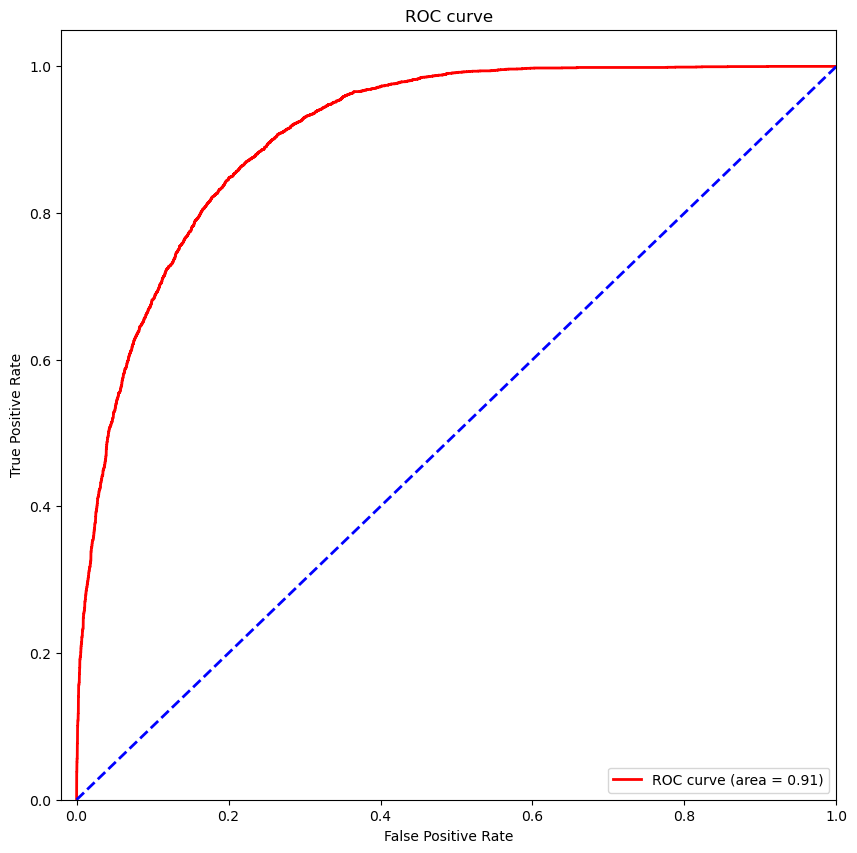

In [52]:

fpr, tpr, _ = roc_curve(y_test.values, pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

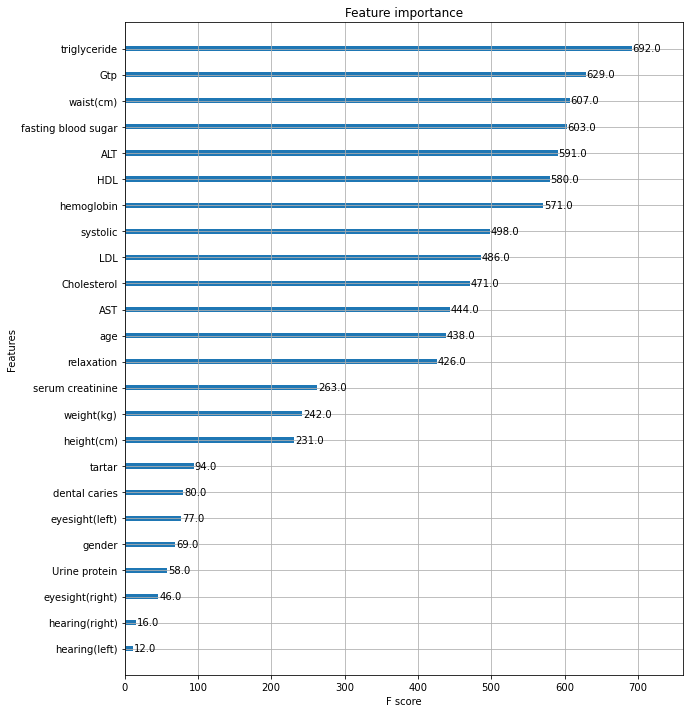

In [17]:
fig, ax = plt.subplots(figsize=(10,12)) # 축 반환
plot_importance(xgb_model,ax=ax)

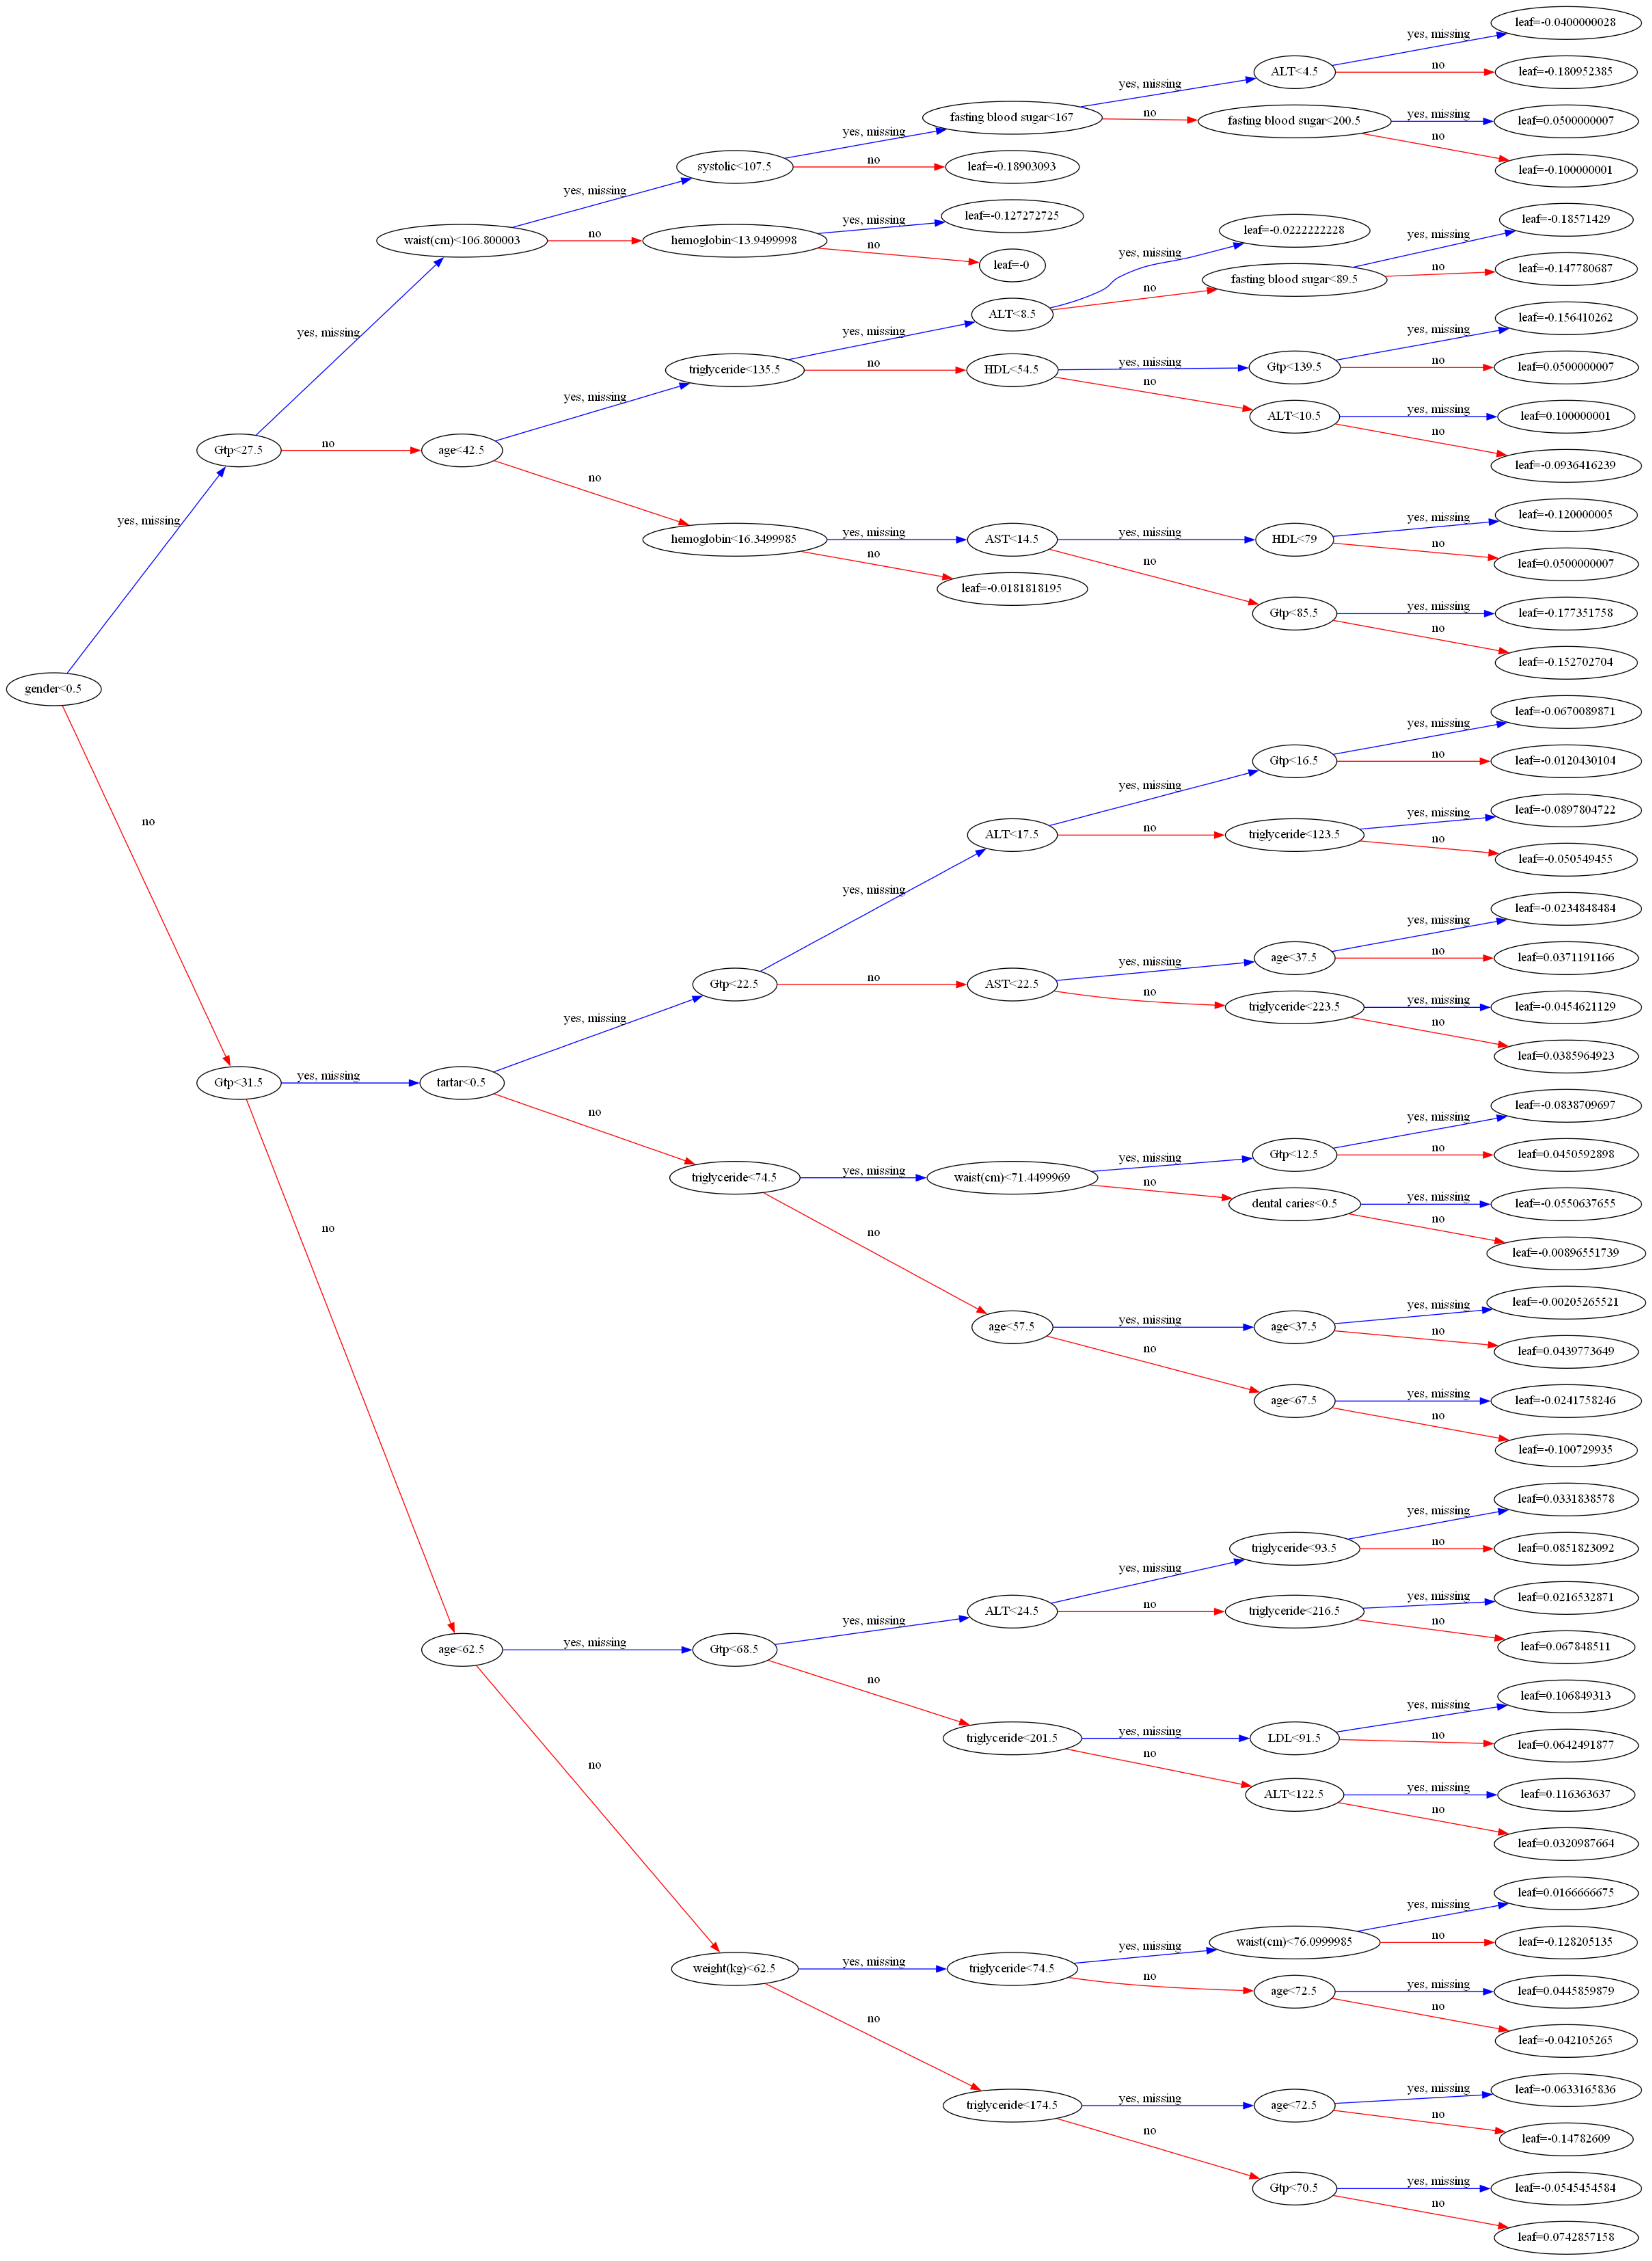

In [18]:
# num_trees : 그림을 여러개 그릴시 그림 번호
# rankdir : 트리의 방향, 디폴트는 위아래 방향
# rankdir="LR" : 왼쪽에서 오른쪽 방향으로 트리를 보여준다.
xgb.plot_tree(xgb_model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(150, 100)

# 이미지를 저장히고싶다면
#fig.savefig('파일이름.png')
plt.show()

### num_rounds의 횟수 증가
#### 얘만변환하고 코드는 위랑 전부 동일

In [55]:
params = {'eta':0.1, 
          'objective':'binary:logistic', 
          'eval_metric':'logloss', 
          'early_stoppings':100, 
          'silent' : 0,
          'verbosity':0} 

num_rounds = 300 # default : 100 # 얘만 변환하고 위에랑 다 똑같음

wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 4.3 sec
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

# 평가지표 시각화 : 오차행렬
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
print(get_clf_eval(y_test, preds, pred_probs))
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])


[0]	train-logloss:0.65860	eval-logloss:0.65803
[1]	train-logloss:0.63003	eval-logloss:0.62904
[2]	train-logloss:0.60601	eval-logloss:0.60449
[3]	train-logloss:0.58590	eval-logloss:0.58399
[4]	train-logloss:0.56862	eval-logloss:0.56641
[5]	train-logloss:0.55366	eval-logloss:0.55108
[6]	train-logloss:0.54077	eval-logloss:0.53800
[7]	train-logloss:0.52957	eval-logloss:0.52666
[8]	train-logloss:0.51975	eval-logloss:0.51655
[9]	train-logloss:0.51118	eval-logloss:0.50777
[10]	train-logloss:0.50356	eval-logloss:0.50005
[11]	train-logloss:0.49690	eval-logloss:0.49325
[12]	train-logloss:0.49095	eval-logloss:0.48706
[13]	train-logloss:0.48565	eval-logloss:0.48167
[14]	train-logloss:0.48098	eval-logloss:0.47670
[15]	train-logloss:0.47663	eval-logloss:0.47229
[16]	train-logloss:0.47271	eval-logloss:0.46842
[17]	train-logloss:0.46919	eval-logloss:0.46482
[18]	train-logloss:0.46598	eval-logloss:0.46150
[19]	train-logloss:0.46317	eval-logloss:0.45865
[20]	train-logloss:0.46056	eval-logloss:0.45602
[2

[170]	train-logloss:0.38738	eval-logloss:0.38468
[171]	train-logloss:0.38689	eval-logloss:0.38420
[172]	train-logloss:0.38666	eval-logloss:0.38401
[173]	train-logloss:0.38661	eval-logloss:0.38396
[174]	train-logloss:0.38657	eval-logloss:0.38394
[175]	train-logloss:0.38634	eval-logloss:0.38371
[176]	train-logloss:0.38620	eval-logloss:0.38356
[177]	train-logloss:0.38570	eval-logloss:0.38311
[178]	train-logloss:0.38565	eval-logloss:0.38307
[179]	train-logloss:0.38515	eval-logloss:0.38267
[180]	train-logloss:0.38465	eval-logloss:0.38216
[181]	train-logloss:0.38430	eval-logloss:0.38177
[182]	train-logloss:0.38394	eval-logloss:0.38142
[183]	train-logloss:0.38334	eval-logloss:0.38084
[184]	train-logloss:0.38306	eval-logloss:0.38057
[185]	train-logloss:0.38287	eval-logloss:0.38041
[186]	train-logloss:0.38262	eval-logloss:0.38009
[187]	train-logloss:0.38242	eval-logloss:0.37994
[188]	train-logloss:0.38228	eval-logloss:0.37986
[189]	train-logloss:0.38202	eval-logloss:0.37958
[190]	train-logloss:

In [30]:
params = {'eta':0.1, 
          'objective':'binary:logistic', 
          'eval_metric':'logloss', 
          'early_stoppings':100, 
          'silent' : 0,
          'verbosity':0}

num_rounds = 400 

wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 5.7 sec
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

# 평가지표 시각화 : 오차행렬
print(get_clf_eval(y_test, preds, pred_probs))
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])

[0]	train-logloss:0.65860	eval-logloss:0.65803
[1]	train-logloss:0.63003	eval-logloss:0.62904
[2]	train-logloss:0.60601	eval-logloss:0.60449
[3]	train-logloss:0.58590	eval-logloss:0.58399
[4]	train-logloss:0.56862	eval-logloss:0.56641
[5]	train-logloss:0.55366	eval-logloss:0.55108
[6]	train-logloss:0.54077	eval-logloss:0.53800
[7]	train-logloss:0.52957	eval-logloss:0.52666
[8]	train-logloss:0.51975	eval-logloss:0.51655
[9]	train-logloss:0.51118	eval-logloss:0.50777
[10]	train-logloss:0.50356	eval-logloss:0.50005
[11]	train-logloss:0.49690	eval-logloss:0.49325
[12]	train-logloss:0.49095	eval-logloss:0.48706
[13]	train-logloss:0.48565	eval-logloss:0.48167
[14]	train-logloss:0.48098	eval-logloss:0.47670
[15]	train-logloss:0.47663	eval-logloss:0.47229
[16]	train-logloss:0.47271	eval-logloss:0.46842
[17]	train-logloss:0.46919	eval-logloss:0.46482
[18]	train-logloss:0.46598	eval-logloss:0.46150
[19]	train-logloss:0.46317	eval-logloss:0.45865
[20]	train-logloss:0.46056	eval-logloss:0.45602
[2

[170]	train-logloss:0.38738	eval-logloss:0.38468
[171]	train-logloss:0.38689	eval-logloss:0.38420
[172]	train-logloss:0.38666	eval-logloss:0.38401
[173]	train-logloss:0.38661	eval-logloss:0.38396
[174]	train-logloss:0.38657	eval-logloss:0.38394
[175]	train-logloss:0.38634	eval-logloss:0.38371
[176]	train-logloss:0.38620	eval-logloss:0.38356
[177]	train-logloss:0.38570	eval-logloss:0.38311
[178]	train-logloss:0.38565	eval-logloss:0.38307
[179]	train-logloss:0.38515	eval-logloss:0.38267
[180]	train-logloss:0.38465	eval-logloss:0.38216
[181]	train-logloss:0.38430	eval-logloss:0.38177
[182]	train-logloss:0.38394	eval-logloss:0.38142
[183]	train-logloss:0.38334	eval-logloss:0.38084
[184]	train-logloss:0.38306	eval-logloss:0.38057
[185]	train-logloss:0.38287	eval-logloss:0.38041
[186]	train-logloss:0.38262	eval-logloss:0.38009
[187]	train-logloss:0.38242	eval-logloss:0.37994
[188]	train-logloss:0.38228	eval-logloss:0.37986
[189]	train-logloss:0.38202	eval-logloss:0.37958
[190]	train-logloss:

[338]	train-logloss:0.34952	eval-logloss:0.34849
[339]	train-logloss:0.34931	eval-logloss:0.34831
[340]	train-logloss:0.34908	eval-logloss:0.34807
[341]	train-logloss:0.34863	eval-logloss:0.34764
[342]	train-logloss:0.34838	eval-logloss:0.34745
[343]	train-logloss:0.34798	eval-logloss:0.34702
[344]	train-logloss:0.34783	eval-logloss:0.34687
[345]	train-logloss:0.34756	eval-logloss:0.34661
[346]	train-logloss:0.34718	eval-logloss:0.34622
[347]	train-logloss:0.34696	eval-logloss:0.34600
[348]	train-logloss:0.34649	eval-logloss:0.34554
[349]	train-logloss:0.34637	eval-logloss:0.34540
[350]	train-logloss:0.34636	eval-logloss:0.34538
[351]	train-logloss:0.34613	eval-logloss:0.34518
[352]	train-logloss:0.34581	eval-logloss:0.34489
[353]	train-logloss:0.34546	eval-logloss:0.34452
[354]	train-logloss:0.34502	eval-logloss:0.34405
[355]	train-logloss:0.34440	eval-logloss:0.34348
[356]	train-logloss:0.34424	eval-logloss:0.34332
[357]	train-logloss:0.34413	eval-logloss:0.34320
[358]	train-logloss:

In [31]:
params = {'eta':0.1, 
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100, 
          'silent' : 0,
          'verbosity':0} # 

num_rounds = 500 

wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) 
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

# 평가지표 시각화 : 오차행렬
print(get_clf_eval(y_test, preds, pred_probs))
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])

[0]	train-logloss:0.65860	eval-logloss:0.65803
[1]	train-logloss:0.63003	eval-logloss:0.62904
[2]	train-logloss:0.60601	eval-logloss:0.60449
[3]	train-logloss:0.58590	eval-logloss:0.58399
[4]	train-logloss:0.56862	eval-logloss:0.56641
[5]	train-logloss:0.55366	eval-logloss:0.55108
[6]	train-logloss:0.54077	eval-logloss:0.53800
[7]	train-logloss:0.52957	eval-logloss:0.52666
[8]	train-logloss:0.51975	eval-logloss:0.51655
[9]	train-logloss:0.51118	eval-logloss:0.50777
[10]	train-logloss:0.50356	eval-logloss:0.50005
[11]	train-logloss:0.49690	eval-logloss:0.49325
[12]	train-logloss:0.49095	eval-logloss:0.48706
[13]	train-logloss:0.48565	eval-logloss:0.48167
[14]	train-logloss:0.48098	eval-logloss:0.47670
[15]	train-logloss:0.47663	eval-logloss:0.47229
[16]	train-logloss:0.47271	eval-logloss:0.46842
[17]	train-logloss:0.46919	eval-logloss:0.46482
[18]	train-logloss:0.46598	eval-logloss:0.46150
[19]	train-logloss:0.46317	eval-logloss:0.45865
[20]	train-logloss:0.46056	eval-logloss:0.45602
[2

[170]	train-logloss:0.38738	eval-logloss:0.38468
[171]	train-logloss:0.38689	eval-logloss:0.38420
[172]	train-logloss:0.38666	eval-logloss:0.38401
[173]	train-logloss:0.38661	eval-logloss:0.38396
[174]	train-logloss:0.38657	eval-logloss:0.38394
[175]	train-logloss:0.38634	eval-logloss:0.38371
[176]	train-logloss:0.38620	eval-logloss:0.38356
[177]	train-logloss:0.38570	eval-logloss:0.38311
[178]	train-logloss:0.38565	eval-logloss:0.38307
[179]	train-logloss:0.38515	eval-logloss:0.38267
[180]	train-logloss:0.38465	eval-logloss:0.38216
[181]	train-logloss:0.38430	eval-logloss:0.38177
[182]	train-logloss:0.38394	eval-logloss:0.38142
[183]	train-logloss:0.38334	eval-logloss:0.38084
[184]	train-logloss:0.38306	eval-logloss:0.38057
[185]	train-logloss:0.38287	eval-logloss:0.38041
[186]	train-logloss:0.38262	eval-logloss:0.38009
[187]	train-logloss:0.38242	eval-logloss:0.37994
[188]	train-logloss:0.38228	eval-logloss:0.37986
[189]	train-logloss:0.38202	eval-logloss:0.37958
[190]	train-logloss:

[338]	train-logloss:0.34952	eval-logloss:0.34849
[339]	train-logloss:0.34931	eval-logloss:0.34831
[340]	train-logloss:0.34908	eval-logloss:0.34807
[341]	train-logloss:0.34863	eval-logloss:0.34764
[342]	train-logloss:0.34838	eval-logloss:0.34745
[343]	train-logloss:0.34798	eval-logloss:0.34702
[344]	train-logloss:0.34783	eval-logloss:0.34687
[345]	train-logloss:0.34756	eval-logloss:0.34661
[346]	train-logloss:0.34718	eval-logloss:0.34622
[347]	train-logloss:0.34696	eval-logloss:0.34600
[348]	train-logloss:0.34649	eval-logloss:0.34554
[349]	train-logloss:0.34637	eval-logloss:0.34540
[350]	train-logloss:0.34636	eval-logloss:0.34538
[351]	train-logloss:0.34613	eval-logloss:0.34518
[352]	train-logloss:0.34581	eval-logloss:0.34489
[353]	train-logloss:0.34546	eval-logloss:0.34452
[354]	train-logloss:0.34502	eval-logloss:0.34405
[355]	train-logloss:0.34440	eval-logloss:0.34348
[356]	train-logloss:0.34424	eval-logloss:0.34332
[357]	train-logloss:0.34413	eval-logloss:0.34320
[358]	train-logloss:

In [32]:
params = {'eta':0.1, 
          'objective':'binary:logistic', 
          'eval_metric':'logloss', 
          'early_stoppings':100,
          'silent' : 0,
          'verbosity':0}

num_rounds = 700 

wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 10.4 sec
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

# 평가지표 시각화 : 오차행렬
print(get_clf_eval(y_test, preds, pred_probs))
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])

[0]	train-logloss:0.65860	eval-logloss:0.65803
[1]	train-logloss:0.63003	eval-logloss:0.62904
[2]	train-logloss:0.60601	eval-logloss:0.60449
[3]	train-logloss:0.58590	eval-logloss:0.58399
[4]	train-logloss:0.56862	eval-logloss:0.56641
[5]	train-logloss:0.55366	eval-logloss:0.55108
[6]	train-logloss:0.54077	eval-logloss:0.53800
[7]	train-logloss:0.52957	eval-logloss:0.52666
[8]	train-logloss:0.51975	eval-logloss:0.51655
[9]	train-logloss:0.51118	eval-logloss:0.50777
[10]	train-logloss:0.50356	eval-logloss:0.50005
[11]	train-logloss:0.49690	eval-logloss:0.49325
[12]	train-logloss:0.49095	eval-logloss:0.48706
[13]	train-logloss:0.48565	eval-logloss:0.48167
[14]	train-logloss:0.48098	eval-logloss:0.47670
[15]	train-logloss:0.47663	eval-logloss:0.47229
[16]	train-logloss:0.47271	eval-logloss:0.46842
[17]	train-logloss:0.46919	eval-logloss:0.46482
[18]	train-logloss:0.46598	eval-logloss:0.46150
[19]	train-logloss:0.46317	eval-logloss:0.45865
[20]	train-logloss:0.46056	eval-logloss:0.45602
[2

[170]	train-logloss:0.38738	eval-logloss:0.38468
[171]	train-logloss:0.38689	eval-logloss:0.38420
[172]	train-logloss:0.38666	eval-logloss:0.38401
[173]	train-logloss:0.38661	eval-logloss:0.38396
[174]	train-logloss:0.38657	eval-logloss:0.38394
[175]	train-logloss:0.38634	eval-logloss:0.38371
[176]	train-logloss:0.38620	eval-logloss:0.38356
[177]	train-logloss:0.38570	eval-logloss:0.38311
[178]	train-logloss:0.38565	eval-logloss:0.38307
[179]	train-logloss:0.38515	eval-logloss:0.38267
[180]	train-logloss:0.38465	eval-logloss:0.38216
[181]	train-logloss:0.38430	eval-logloss:0.38177
[182]	train-logloss:0.38394	eval-logloss:0.38142
[183]	train-logloss:0.38334	eval-logloss:0.38084
[184]	train-logloss:0.38306	eval-logloss:0.38057
[185]	train-logloss:0.38287	eval-logloss:0.38041
[186]	train-logloss:0.38262	eval-logloss:0.38009
[187]	train-logloss:0.38242	eval-logloss:0.37994
[188]	train-logloss:0.38228	eval-logloss:0.37986
[189]	train-logloss:0.38202	eval-logloss:0.37958
[190]	train-logloss:

[338]	train-logloss:0.34952	eval-logloss:0.34849
[339]	train-logloss:0.34931	eval-logloss:0.34831
[340]	train-logloss:0.34908	eval-logloss:0.34807
[341]	train-logloss:0.34863	eval-logloss:0.34764
[342]	train-logloss:0.34838	eval-logloss:0.34745
[343]	train-logloss:0.34798	eval-logloss:0.34702
[344]	train-logloss:0.34783	eval-logloss:0.34687
[345]	train-logloss:0.34756	eval-logloss:0.34661
[346]	train-logloss:0.34718	eval-logloss:0.34622
[347]	train-logloss:0.34696	eval-logloss:0.34600
[348]	train-logloss:0.34649	eval-logloss:0.34554
[349]	train-logloss:0.34637	eval-logloss:0.34540
[350]	train-logloss:0.34636	eval-logloss:0.34538
[351]	train-logloss:0.34613	eval-logloss:0.34518
[352]	train-logloss:0.34581	eval-logloss:0.34489
[353]	train-logloss:0.34546	eval-logloss:0.34452
[354]	train-logloss:0.34502	eval-logloss:0.34405
[355]	train-logloss:0.34440	eval-logloss:0.34348
[356]	train-logloss:0.34424	eval-logloss:0.34332
[357]	train-logloss:0.34413	eval-logloss:0.34320
[358]	train-logloss:

[506]	train-logloss:0.31314	eval-logloss:0.31253
[507]	train-logloss:0.31312	eval-logloss:0.31251
[508]	train-logloss:0.31290	eval-logloss:0.31230
[509]	train-logloss:0.31256	eval-logloss:0.31193
[510]	train-logloss:0.31224	eval-logloss:0.31164
[511]	train-logloss:0.31213	eval-logloss:0.31152
[512]	train-logloss:0.31181	eval-logloss:0.31118
[513]	train-logloss:0.31154	eval-logloss:0.31087
[514]	train-logloss:0.31135	eval-logloss:0.31067
[515]	train-logloss:0.31107	eval-logloss:0.31044
[516]	train-logloss:0.31075	eval-logloss:0.31015
[517]	train-logloss:0.31052	eval-logloss:0.30992
[518]	train-logloss:0.31022	eval-logloss:0.30968
[519]	train-logloss:0.30993	eval-logloss:0.30944
[520]	train-logloss:0.30969	eval-logloss:0.30922
[521]	train-logloss:0.30930	eval-logloss:0.30882
[522]	train-logloss:0.30908	eval-logloss:0.30863
[523]	train-logloss:0.30880	eval-logloss:0.30839
[524]	train-logloss:0.30857	eval-logloss:0.30818
[525]	train-logloss:0.30842	eval-logloss:0.30801
[526]	train-logloss:

[674]	train-logloss:0.28048	eval-logloss:0.28107
[675]	train-logloss:0.28033	eval-logloss:0.28093
[676]	train-logloss:0.28021	eval-logloss:0.28081
[677]	train-logloss:0.28018	eval-logloss:0.28079
[678]	train-logloss:0.28012	eval-logloss:0.28074
[679]	train-logloss:0.28007	eval-logloss:0.28068
[680]	train-logloss:0.28002	eval-logloss:0.28065
[681]	train-logloss:0.27996	eval-logloss:0.28059
[682]	train-logloss:0.27986	eval-logloss:0.28048
[683]	train-logloss:0.27969	eval-logloss:0.28030
[684]	train-logloss:0.27955	eval-logloss:0.28016
[685]	train-logloss:0.27945	eval-logloss:0.28006
[686]	train-logloss:0.27935	eval-logloss:0.27995
[687]	train-logloss:0.27926	eval-logloss:0.27985
[688]	train-logloss:0.27915	eval-logloss:0.27974
[689]	train-logloss:0.27903	eval-logloss:0.27965
[690]	train-logloss:0.27887	eval-logloss:0.27951
[691]	train-logloss:0.27862	eval-logloss:0.27933
[692]	train-logloss:0.27837	eval-logloss:0.27906
[693]	train-logloss:0.27822	eval-logloss:0.27890
[694]	train-logloss:

In [33]:
params = {'eta':0.1,
          'objective':'binary:logistic', 
          'eval_metric':'logloss', 
          'early_stoppings':100, 
          'silent' : 0,
          'verbosity':0} 

num_rounds = 1000 

wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) 
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

# 평가지표 시각화 : 오차행렬
print(get_clf_eval(y_test, preds, pred_probs))
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])

[0]	train-logloss:0.65860	eval-logloss:0.65803
[1]	train-logloss:0.63003	eval-logloss:0.62904
[2]	train-logloss:0.60601	eval-logloss:0.60449
[3]	train-logloss:0.58590	eval-logloss:0.58399
[4]	train-logloss:0.56862	eval-logloss:0.56641
[5]	train-logloss:0.55366	eval-logloss:0.55108
[6]	train-logloss:0.54077	eval-logloss:0.53800
[7]	train-logloss:0.52957	eval-logloss:0.52666
[8]	train-logloss:0.51975	eval-logloss:0.51655
[9]	train-logloss:0.51118	eval-logloss:0.50777
[10]	train-logloss:0.50356	eval-logloss:0.50005
[11]	train-logloss:0.49690	eval-logloss:0.49325
[12]	train-logloss:0.49095	eval-logloss:0.48706
[13]	train-logloss:0.48565	eval-logloss:0.48167
[14]	train-logloss:0.48098	eval-logloss:0.47670
[15]	train-logloss:0.47663	eval-logloss:0.47229
[16]	train-logloss:0.47271	eval-logloss:0.46842
[17]	train-logloss:0.46919	eval-logloss:0.46482
[18]	train-logloss:0.46598	eval-logloss:0.46150
[19]	train-logloss:0.46317	eval-logloss:0.45865
[20]	train-logloss:0.46056	eval-logloss:0.45602
[2

[170]	train-logloss:0.38738	eval-logloss:0.38468
[171]	train-logloss:0.38689	eval-logloss:0.38420
[172]	train-logloss:0.38666	eval-logloss:0.38401
[173]	train-logloss:0.38661	eval-logloss:0.38396
[174]	train-logloss:0.38657	eval-logloss:0.38394
[175]	train-logloss:0.38634	eval-logloss:0.38371
[176]	train-logloss:0.38620	eval-logloss:0.38356
[177]	train-logloss:0.38570	eval-logloss:0.38311
[178]	train-logloss:0.38565	eval-logloss:0.38307
[179]	train-logloss:0.38515	eval-logloss:0.38267
[180]	train-logloss:0.38465	eval-logloss:0.38216
[181]	train-logloss:0.38430	eval-logloss:0.38177
[182]	train-logloss:0.38394	eval-logloss:0.38142
[183]	train-logloss:0.38334	eval-logloss:0.38084
[184]	train-logloss:0.38306	eval-logloss:0.38057
[185]	train-logloss:0.38287	eval-logloss:0.38041
[186]	train-logloss:0.38262	eval-logloss:0.38009
[187]	train-logloss:0.38242	eval-logloss:0.37994
[188]	train-logloss:0.38228	eval-logloss:0.37986
[189]	train-logloss:0.38202	eval-logloss:0.37958
[190]	train-logloss:

[338]	train-logloss:0.34952	eval-logloss:0.34849
[339]	train-logloss:0.34931	eval-logloss:0.34831
[340]	train-logloss:0.34908	eval-logloss:0.34807
[341]	train-logloss:0.34863	eval-logloss:0.34764
[342]	train-logloss:0.34838	eval-logloss:0.34745
[343]	train-logloss:0.34798	eval-logloss:0.34702
[344]	train-logloss:0.34783	eval-logloss:0.34687
[345]	train-logloss:0.34756	eval-logloss:0.34661
[346]	train-logloss:0.34718	eval-logloss:0.34622
[347]	train-logloss:0.34696	eval-logloss:0.34600
[348]	train-logloss:0.34649	eval-logloss:0.34554
[349]	train-logloss:0.34637	eval-logloss:0.34540
[350]	train-logloss:0.34636	eval-logloss:0.34538
[351]	train-logloss:0.34613	eval-logloss:0.34518
[352]	train-logloss:0.34581	eval-logloss:0.34489
[353]	train-logloss:0.34546	eval-logloss:0.34452
[354]	train-logloss:0.34502	eval-logloss:0.34405
[355]	train-logloss:0.34440	eval-logloss:0.34348
[356]	train-logloss:0.34424	eval-logloss:0.34332
[357]	train-logloss:0.34413	eval-logloss:0.34320
[358]	train-logloss:

[506]	train-logloss:0.31314	eval-logloss:0.31253
[507]	train-logloss:0.31312	eval-logloss:0.31251
[508]	train-logloss:0.31290	eval-logloss:0.31230
[509]	train-logloss:0.31256	eval-logloss:0.31193
[510]	train-logloss:0.31224	eval-logloss:0.31164
[511]	train-logloss:0.31213	eval-logloss:0.31152
[512]	train-logloss:0.31181	eval-logloss:0.31118
[513]	train-logloss:0.31154	eval-logloss:0.31087
[514]	train-logloss:0.31135	eval-logloss:0.31067
[515]	train-logloss:0.31107	eval-logloss:0.31044
[516]	train-logloss:0.31075	eval-logloss:0.31015
[517]	train-logloss:0.31052	eval-logloss:0.30992
[518]	train-logloss:0.31022	eval-logloss:0.30968
[519]	train-logloss:0.30993	eval-logloss:0.30944
[520]	train-logloss:0.30969	eval-logloss:0.30922
[521]	train-logloss:0.30930	eval-logloss:0.30882
[522]	train-logloss:0.30908	eval-logloss:0.30863
[523]	train-logloss:0.30880	eval-logloss:0.30839
[524]	train-logloss:0.30857	eval-logloss:0.30818
[525]	train-logloss:0.30842	eval-logloss:0.30801
[526]	train-logloss:

[674]	train-logloss:0.28048	eval-logloss:0.28107
[675]	train-logloss:0.28033	eval-logloss:0.28093
[676]	train-logloss:0.28021	eval-logloss:0.28081
[677]	train-logloss:0.28018	eval-logloss:0.28079
[678]	train-logloss:0.28012	eval-logloss:0.28074
[679]	train-logloss:0.28007	eval-logloss:0.28068
[680]	train-logloss:0.28002	eval-logloss:0.28065
[681]	train-logloss:0.27996	eval-logloss:0.28059
[682]	train-logloss:0.27986	eval-logloss:0.28048
[683]	train-logloss:0.27969	eval-logloss:0.28030
[684]	train-logloss:0.27955	eval-logloss:0.28016
[685]	train-logloss:0.27945	eval-logloss:0.28006
[686]	train-logloss:0.27935	eval-logloss:0.27995
[687]	train-logloss:0.27926	eval-logloss:0.27985
[688]	train-logloss:0.27915	eval-logloss:0.27974
[689]	train-logloss:0.27903	eval-logloss:0.27965
[690]	train-logloss:0.27887	eval-logloss:0.27951
[691]	train-logloss:0.27862	eval-logloss:0.27933
[692]	train-logloss:0.27837	eval-logloss:0.27906
[693]	train-logloss:0.27822	eval-logloss:0.27890
[694]	train-logloss:

[842]	train-logloss:0.25204	eval-logloss:0.25287
[843]	train-logloss:0.25193	eval-logloss:0.25275
[844]	train-logloss:0.25192	eval-logloss:0.25275
[845]	train-logloss:0.25190	eval-logloss:0.25274
[846]	train-logloss:0.25188	eval-logloss:0.25273
[847]	train-logloss:0.25155	eval-logloss:0.25243
[848]	train-logloss:0.25131	eval-logloss:0.25217
[849]	train-logloss:0.25100	eval-logloss:0.25188
[850]	train-logloss:0.25083	eval-logloss:0.25172
[851]	train-logloss:0.25055	eval-logloss:0.25142
[852]	train-logloss:0.25033	eval-logloss:0.25124
[853]	train-logloss:0.25017	eval-logloss:0.25107
[854]	train-logloss:0.24991	eval-logloss:0.25077
[855]	train-logloss:0.24972	eval-logloss:0.25060
[856]	train-logloss:0.24946	eval-logloss:0.25035
[857]	train-logloss:0.24921	eval-logloss:0.25007
[858]	train-logloss:0.24903	eval-logloss:0.24991
[859]	train-logloss:0.24887	eval-logloss:0.24972
[860]	train-logloss:0.24882	eval-logloss:0.24969
[861]	train-logloss:0.24880	eval-logloss:0.24967
[862]	train-logloss:

In [34]:
params = {'eta':0.1, 
          'objective':'binary:logistic',
          'eval_metric':'logloss', 
          'early_stoppings':100, 
          'silent' : 0,
          'verbosity':0}

num_rounds = 2000 

wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 5.4 sec
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

# 평가지표 시각화 : 오차행렬
print(get_clf_eval(y_test, preds, pred_probs))
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])

[0]	train-logloss:0.65860	eval-logloss:0.65803
[1]	train-logloss:0.63003	eval-logloss:0.62904
[2]	train-logloss:0.60601	eval-logloss:0.60449
[3]	train-logloss:0.58590	eval-logloss:0.58399
[4]	train-logloss:0.56862	eval-logloss:0.56641
[5]	train-logloss:0.55366	eval-logloss:0.55108
[6]	train-logloss:0.54077	eval-logloss:0.53800
[7]	train-logloss:0.52957	eval-logloss:0.52666
[8]	train-logloss:0.51975	eval-logloss:0.51655
[9]	train-logloss:0.51118	eval-logloss:0.50777
[10]	train-logloss:0.50356	eval-logloss:0.50005
[11]	train-logloss:0.49690	eval-logloss:0.49325
[12]	train-logloss:0.49095	eval-logloss:0.48706
[13]	train-logloss:0.48565	eval-logloss:0.48167
[14]	train-logloss:0.48098	eval-logloss:0.47670
[15]	train-logloss:0.47663	eval-logloss:0.47229
[16]	train-logloss:0.47271	eval-logloss:0.46842
[17]	train-logloss:0.46919	eval-logloss:0.46482
[18]	train-logloss:0.46598	eval-logloss:0.46150
[19]	train-logloss:0.46317	eval-logloss:0.45865
[20]	train-logloss:0.46056	eval-logloss:0.45602
[2

[170]	train-logloss:0.38738	eval-logloss:0.38468
[171]	train-logloss:0.38689	eval-logloss:0.38420
[172]	train-logloss:0.38666	eval-logloss:0.38401
[173]	train-logloss:0.38661	eval-logloss:0.38396
[174]	train-logloss:0.38657	eval-logloss:0.38394
[175]	train-logloss:0.38634	eval-logloss:0.38371
[176]	train-logloss:0.38620	eval-logloss:0.38356
[177]	train-logloss:0.38570	eval-logloss:0.38311
[178]	train-logloss:0.38565	eval-logloss:0.38307
[179]	train-logloss:0.38515	eval-logloss:0.38267
[180]	train-logloss:0.38465	eval-logloss:0.38216
[181]	train-logloss:0.38430	eval-logloss:0.38177
[182]	train-logloss:0.38394	eval-logloss:0.38142
[183]	train-logloss:0.38334	eval-logloss:0.38084
[184]	train-logloss:0.38306	eval-logloss:0.38057
[185]	train-logloss:0.38287	eval-logloss:0.38041
[186]	train-logloss:0.38262	eval-logloss:0.38009
[187]	train-logloss:0.38242	eval-logloss:0.37994
[188]	train-logloss:0.38228	eval-logloss:0.37986
[189]	train-logloss:0.38202	eval-logloss:0.37958
[190]	train-logloss:

[338]	train-logloss:0.34952	eval-logloss:0.34849
[339]	train-logloss:0.34931	eval-logloss:0.34831
[340]	train-logloss:0.34908	eval-logloss:0.34807
[341]	train-logloss:0.34863	eval-logloss:0.34764
[342]	train-logloss:0.34838	eval-logloss:0.34745
[343]	train-logloss:0.34798	eval-logloss:0.34702
[344]	train-logloss:0.34783	eval-logloss:0.34687
[345]	train-logloss:0.34756	eval-logloss:0.34661
[346]	train-logloss:0.34718	eval-logloss:0.34622
[347]	train-logloss:0.34696	eval-logloss:0.34600
[348]	train-logloss:0.34649	eval-logloss:0.34554
[349]	train-logloss:0.34637	eval-logloss:0.34540
[350]	train-logloss:0.34636	eval-logloss:0.34538
[351]	train-logloss:0.34613	eval-logloss:0.34518
[352]	train-logloss:0.34581	eval-logloss:0.34489
[353]	train-logloss:0.34546	eval-logloss:0.34452
[354]	train-logloss:0.34502	eval-logloss:0.34405
[355]	train-logloss:0.34440	eval-logloss:0.34348
[356]	train-logloss:0.34424	eval-logloss:0.34332
[357]	train-logloss:0.34413	eval-logloss:0.34320
[358]	train-logloss:

[506]	train-logloss:0.31314	eval-logloss:0.31253
[507]	train-logloss:0.31312	eval-logloss:0.31251
[508]	train-logloss:0.31290	eval-logloss:0.31230
[509]	train-logloss:0.31256	eval-logloss:0.31193
[510]	train-logloss:0.31224	eval-logloss:0.31164
[511]	train-logloss:0.31213	eval-logloss:0.31152
[512]	train-logloss:0.31181	eval-logloss:0.31118
[513]	train-logloss:0.31154	eval-logloss:0.31087
[514]	train-logloss:0.31135	eval-logloss:0.31067
[515]	train-logloss:0.31107	eval-logloss:0.31044
[516]	train-logloss:0.31075	eval-logloss:0.31015
[517]	train-logloss:0.31052	eval-logloss:0.30992
[518]	train-logloss:0.31022	eval-logloss:0.30968
[519]	train-logloss:0.30993	eval-logloss:0.30944
[520]	train-logloss:0.30969	eval-logloss:0.30922
[521]	train-logloss:0.30930	eval-logloss:0.30882
[522]	train-logloss:0.30908	eval-logloss:0.30863
[523]	train-logloss:0.30880	eval-logloss:0.30839
[524]	train-logloss:0.30857	eval-logloss:0.30818
[525]	train-logloss:0.30842	eval-logloss:0.30801
[526]	train-logloss:

[674]	train-logloss:0.28048	eval-logloss:0.28107
[675]	train-logloss:0.28033	eval-logloss:0.28093
[676]	train-logloss:0.28021	eval-logloss:0.28081
[677]	train-logloss:0.28018	eval-logloss:0.28079
[678]	train-logloss:0.28012	eval-logloss:0.28074
[679]	train-logloss:0.28007	eval-logloss:0.28068
[680]	train-logloss:0.28002	eval-logloss:0.28065
[681]	train-logloss:0.27996	eval-logloss:0.28059
[682]	train-logloss:0.27986	eval-logloss:0.28048
[683]	train-logloss:0.27969	eval-logloss:0.28030
[684]	train-logloss:0.27955	eval-logloss:0.28016
[685]	train-logloss:0.27945	eval-logloss:0.28006
[686]	train-logloss:0.27935	eval-logloss:0.27995
[687]	train-logloss:0.27926	eval-logloss:0.27985
[688]	train-logloss:0.27915	eval-logloss:0.27974
[689]	train-logloss:0.27903	eval-logloss:0.27965
[690]	train-logloss:0.27887	eval-logloss:0.27951
[691]	train-logloss:0.27862	eval-logloss:0.27933
[692]	train-logloss:0.27837	eval-logloss:0.27906
[693]	train-logloss:0.27822	eval-logloss:0.27890
[694]	train-logloss:

[842]	train-logloss:0.25204	eval-logloss:0.25287
[843]	train-logloss:0.25193	eval-logloss:0.25275
[844]	train-logloss:0.25192	eval-logloss:0.25275
[845]	train-logloss:0.25190	eval-logloss:0.25274
[846]	train-logloss:0.25188	eval-logloss:0.25273
[847]	train-logloss:0.25155	eval-logloss:0.25243
[848]	train-logloss:0.25131	eval-logloss:0.25217
[849]	train-logloss:0.25100	eval-logloss:0.25188
[850]	train-logloss:0.25083	eval-logloss:0.25172
[851]	train-logloss:0.25055	eval-logloss:0.25142
[852]	train-logloss:0.25033	eval-logloss:0.25124
[853]	train-logloss:0.25017	eval-logloss:0.25107
[854]	train-logloss:0.24991	eval-logloss:0.25077
[855]	train-logloss:0.24972	eval-logloss:0.25060
[856]	train-logloss:0.24946	eval-logloss:0.25035
[857]	train-logloss:0.24921	eval-logloss:0.25007
[858]	train-logloss:0.24903	eval-logloss:0.24991
[859]	train-logloss:0.24887	eval-logloss:0.24972
[860]	train-logloss:0.24882	eval-logloss:0.24969
[861]	train-logloss:0.24880	eval-logloss:0.24967
[862]	train-logloss:

[1010]	train-logloss:0.22610	eval-logloss:0.22729
[1011]	train-logloss:0.22590	eval-logloss:0.22711
[1012]	train-logloss:0.22564	eval-logloss:0.22689
[1013]	train-logloss:0.22542	eval-logloss:0.22667
[1014]	train-logloss:0.22533	eval-logloss:0.22655
[1015]	train-logloss:0.22514	eval-logloss:0.22639
[1016]	train-logloss:0.22492	eval-logloss:0.22617
[1017]	train-logloss:0.22478	eval-logloss:0.22602
[1018]	train-logloss:0.22470	eval-logloss:0.22592
[1019]	train-logloss:0.22459	eval-logloss:0.22583
[1020]	train-logloss:0.22452	eval-logloss:0.22575
[1021]	train-logloss:0.22439	eval-logloss:0.22558
[1022]	train-logloss:0.22420	eval-logloss:0.22537
[1023]	train-logloss:0.22408	eval-logloss:0.22526
[1024]	train-logloss:0.22384	eval-logloss:0.22501
[1025]	train-logloss:0.22365	eval-logloss:0.22481
[1026]	train-logloss:0.22359	eval-logloss:0.22474
[1027]	train-logloss:0.22333	eval-logloss:0.22451
[1028]	train-logloss:0.22319	eval-logloss:0.22442
[1029]	train-logloss:0.22312	eval-logloss:0.22434


[1174]	train-logloss:0.20247	eval-logloss:0.20387
[1175]	train-logloss:0.20242	eval-logloss:0.20382
[1176]	train-logloss:0.20223	eval-logloss:0.20363
[1177]	train-logloss:0.20206	eval-logloss:0.20347
[1178]	train-logloss:0.20175	eval-logloss:0.20310
[1179]	train-logloss:0.20160	eval-logloss:0.20295
[1180]	train-logloss:0.20148	eval-logloss:0.20282
[1181]	train-logloss:0.20142	eval-logloss:0.20277
[1182]	train-logloss:0.20128	eval-logloss:0.20266
[1183]	train-logloss:0.20123	eval-logloss:0.20262
[1184]	train-logloss:0.20113	eval-logloss:0.20252
[1185]	train-logloss:0.20092	eval-logloss:0.20233
[1186]	train-logloss:0.20074	eval-logloss:0.20216
[1187]	train-logloss:0.20053	eval-logloss:0.20194
[1188]	train-logloss:0.20031	eval-logloss:0.20170
[1189]	train-logloss:0.20023	eval-logloss:0.20163
[1190]	train-logloss:0.20005	eval-logloss:0.20146
[1191]	train-logloss:0.19975	eval-logloss:0.20120
[1192]	train-logloss:0.19965	eval-logloss:0.20109
[1193]	train-logloss:0.19963	eval-logloss:0.20108


[1338]	train-logloss:0.18345	eval-logloss:0.18501
[1339]	train-logloss:0.18341	eval-logloss:0.18496
[1340]	train-logloss:0.18332	eval-logloss:0.18487
[1341]	train-logloss:0.18315	eval-logloss:0.18467
[1342]	train-logloss:0.18297	eval-logloss:0.18450
[1343]	train-logloss:0.18280	eval-logloss:0.18433
[1344]	train-logloss:0.18271	eval-logloss:0.18422
[1345]	train-logloss:0.18265	eval-logloss:0.18417
[1346]	train-logloss:0.18261	eval-logloss:0.18412
[1347]	train-logloss:0.18243	eval-logloss:0.18393
[1348]	train-logloss:0.18226	eval-logloss:0.18379
[1349]	train-logloss:0.18211	eval-logloss:0.18361
[1350]	train-logloss:0.18193	eval-logloss:0.18342
[1351]	train-logloss:0.18173	eval-logloss:0.18325
[1352]	train-logloss:0.18160	eval-logloss:0.18308
[1353]	train-logloss:0.18141	eval-logloss:0.18291
[1354]	train-logloss:0.18134	eval-logloss:0.18284
[1355]	train-logloss:0.18131	eval-logloss:0.18281
[1356]	train-logloss:0.18127	eval-logloss:0.18277
[1357]	train-logloss:0.18108	eval-logloss:0.18260


[1502]	train-logloss:0.16502	eval-logloss:0.16654
[1503]	train-logloss:0.16490	eval-logloss:0.16640
[1504]	train-logloss:0.16475	eval-logloss:0.16626
[1505]	train-logloss:0.16458	eval-logloss:0.16610
[1506]	train-logloss:0.16452	eval-logloss:0.16604
[1507]	train-logloss:0.16441	eval-logloss:0.16593
[1508]	train-logloss:0.16430	eval-logloss:0.16580
[1509]	train-logloss:0.16415	eval-logloss:0.16564
[1510]	train-logloss:0.16396	eval-logloss:0.16548
[1511]	train-logloss:0.16373	eval-logloss:0.16528
[1512]	train-logloss:0.16359	eval-logloss:0.16514
[1513]	train-logloss:0.16352	eval-logloss:0.16506
[1514]	train-logloss:0.16330	eval-logloss:0.16484
[1515]	train-logloss:0.16313	eval-logloss:0.16466
[1516]	train-logloss:0.16296	eval-logloss:0.16446
[1517]	train-logloss:0.16282	eval-logloss:0.16430
[1518]	train-logloss:0.16263	eval-logloss:0.16411
[1519]	train-logloss:0.16243	eval-logloss:0.16392
[1520]	train-logloss:0.16233	eval-logloss:0.16379
[1521]	train-logloss:0.16232	eval-logloss:0.16378


[1666]	train-logloss:0.14931	eval-logloss:0.15062
[1667]	train-logloss:0.14924	eval-logloss:0.15055
[1668]	train-logloss:0.14912	eval-logloss:0.15043
[1669]	train-logloss:0.14906	eval-logloss:0.15036
[1670]	train-logloss:0.14905	eval-logloss:0.15036
[1671]	train-logloss:0.14904	eval-logloss:0.15035
[1672]	train-logloss:0.14897	eval-logloss:0.15028
[1673]	train-logloss:0.14881	eval-logloss:0.15011
[1674]	train-logloss:0.14866	eval-logloss:0.14998
[1675]	train-logloss:0.14853	eval-logloss:0.14985
[1676]	train-logloss:0.14833	eval-logloss:0.14964
[1677]	train-logloss:0.14820	eval-logloss:0.14947
[1678]	train-logloss:0.14805	eval-logloss:0.14934
[1679]	train-logloss:0.14789	eval-logloss:0.14919
[1680]	train-logloss:0.14777	eval-logloss:0.14907
[1681]	train-logloss:0.14759	eval-logloss:0.14887
[1682]	train-logloss:0.14741	eval-logloss:0.14873
[1683]	train-logloss:0.14731	eval-logloss:0.14862
[1684]	train-logloss:0.14720	eval-logloss:0.14851
[1685]	train-logloss:0.14712	eval-logloss:0.14844


[1830]	train-logloss:0.13479	eval-logloss:0.13613
[1831]	train-logloss:0.13478	eval-logloss:0.13612
[1832]	train-logloss:0.13469	eval-logloss:0.13602
[1833]	train-logloss:0.13454	eval-logloss:0.13587
[1834]	train-logloss:0.13448	eval-logloss:0.13582
[1835]	train-logloss:0.13437	eval-logloss:0.13570
[1836]	train-logloss:0.13432	eval-logloss:0.13565
[1837]	train-logloss:0.13429	eval-logloss:0.13563
[1838]	train-logloss:0.13420	eval-logloss:0.13552
[1839]	train-logloss:0.13416	eval-logloss:0.13548
[1840]	train-logloss:0.13411	eval-logloss:0.13542
[1841]	train-logloss:0.13397	eval-logloss:0.13531
[1842]	train-logloss:0.13385	eval-logloss:0.13519
[1843]	train-logloss:0.13371	eval-logloss:0.13503
[1844]	train-logloss:0.13361	eval-logloss:0.13491
[1845]	train-logloss:0.13347	eval-logloss:0.13478
[1846]	train-logloss:0.13334	eval-logloss:0.13463
[1847]	train-logloss:0.13320	eval-logloss:0.13449
[1848]	train-logloss:0.13310	eval-logloss:0.13440
[1849]	train-logloss:0.13301	eval-logloss:0.13429


[1994]	train-logloss:0.12189	eval-logloss:0.12318
[1995]	train-logloss:0.12183	eval-logloss:0.12311
[1996]	train-logloss:0.12181	eval-logloss:0.12309
[1997]	train-logloss:0.12176	eval-logloss:0.12305
[1998]	train-logloss:0.12168	eval-logloss:0.12299
[1999]	train-logloss:0.12158	eval-logloss:0.12289
XGB 수행 시간: 46.6 초 
분류 결과 : 1.0 
오차 행렬
[[6975   61]
 [  70 4033]]
정확도: 0.9882, 정밀도: 0.9851, 재현율: 0.9829,    F1: 0.9840, AUC:0.9994
None


In [36]:
pd.DataFrame(xgb_check, columns=['num_rounds','accuracy','precision','recall','f1_score','AUC'])

num_rounds  accuracy  precision    recall  f1_score       AUC
0         200  0.822964   0.748195  0.782842  0.765126  0.908285
1         300  0.844421   0.778824  0.806727  0.792530  0.923828
2         300  0.844421   0.778824  0.806727  0.792530  0.923828
3         400  0.862555   0.802873  0.830855  0.816625  0.937554
4         500  0.880330   0.828666  0.851085  0.839726  0.949811
5         700  0.904929   0.865690  0.878138  0.871869  0.967503
6        1000  0.937876   0.912056  0.920058  0.916040  0.984693
7        2000  0.988240   0.985100  0.982939  0.984019  0.999400

### 2.2 Scikit-leran wrapper를 사용한 XGB 모델

#### 2.2.1 분류기 생성

In [126]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# Train the model
start = time.time()
xgb_clf = XGBClassifier(learning_rate=0.1,n_estimators=1000, # n_estimators를 1000으로 설정
                        max_depth=3,
                        silent=False,
                        objective='binary:logistic',
                        booster='gbtree',
                        n_jobs=1,
                        nthread=None,
                        gamma=0).fit(x_train,y_train)
# Make prediction
xgb_pred = xgb_clf.predict(x_test)
# Get predicted probability
xgb_pred_probs = xgb_clf.predict_proba(x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 23.2 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,xgb_pred)))

XGB 수행 시간: 24.3 초 
분류 결과 : 0.8 


In [6]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve


#### 2.2.2 평가지표 시각화 : 오차행렬, ROC curve

In [27]:
get_clf_eval(y_test, xgb_pred, xgb_pred_probs)

오차 행렬
[[5845 1191]
 [1037 3066]]
정확도: 0.8000, 정밀도: 0.7202, 재현율: 0.7473,    F1: 0.7335, AUC:0.8878


In [58]:
hyper = []
hyper.append(['Non scaled' , accuracy_score(y_test,xgb_pred),precision_score(y_test,xgb_pred),recall_score(y_test,xgb_pred),f1_score(y_test,xgb_pred),roc_auc_score(y_test,xgb_pred_probs)])

In [131]:
scale.insert(0, ['Non scaled' , accuracy_score(y_test,xgb_pred),precision_score(y_test,xgb_pred),recall_score(y_test,xgb_pred),f1_score(y_test,xgb_pred),roc_auc_score(y_test,xgb_pred_probs)])

In [136]:
pd.DataFrame(scale , columns=['','정확도','정밀도','재현율','f1 스코어', 'ROC_AUC 스코어'])

정확도       정밀도       재현율    f1 스코어  ROC_AUC 스코어
0       Non scaled  0.799982  0.720226  0.747258  0.733493     0.887832
1  Standard sclaer  0.938055  0.916118  0.915671  0.915895     0.983373
2    Robust sclaer  0.938415  0.917624  0.914940  0.916280     0.984355
3    MinMax scaler  0.939043  0.917969  0.916403  0.917185     0.984339
4       Log scaler  0.939043  0.917969  0.916403  0.917185     0.984339

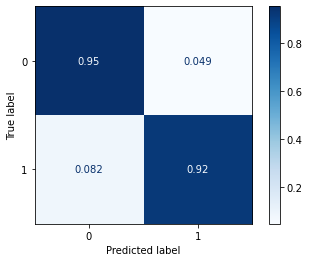

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgb_clf, x_test, y_test, cmap = plt.cm.Blues, normalize = "true");

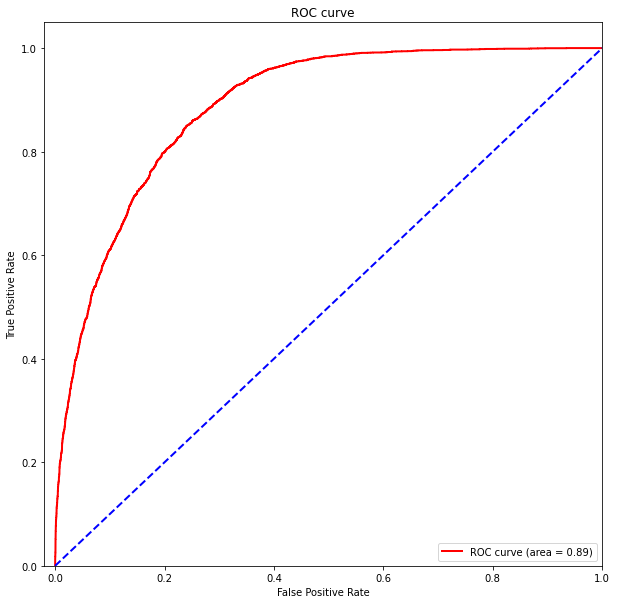

In [29]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

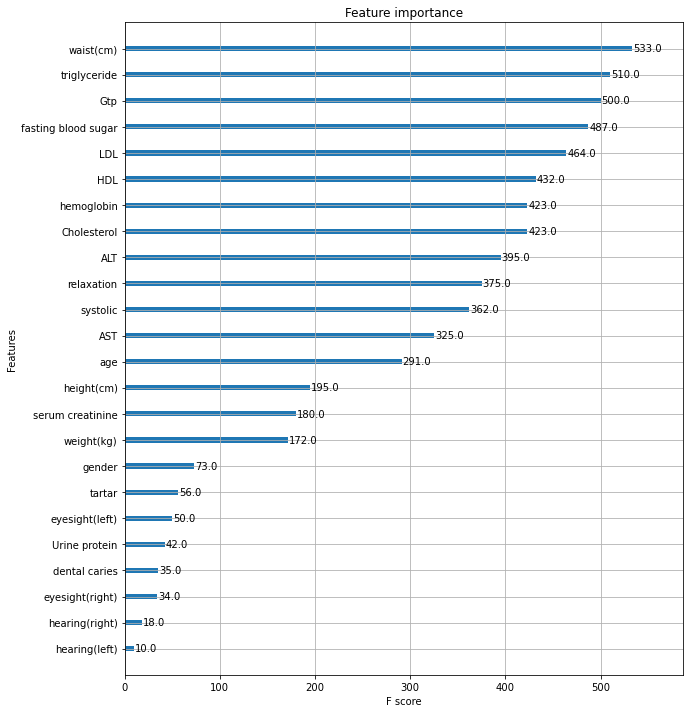

In [30]:
fig, ax = plt.subplots(figsize=(10,12)) # 축 반환
plot_importance(xgb_clf,ax=ax)

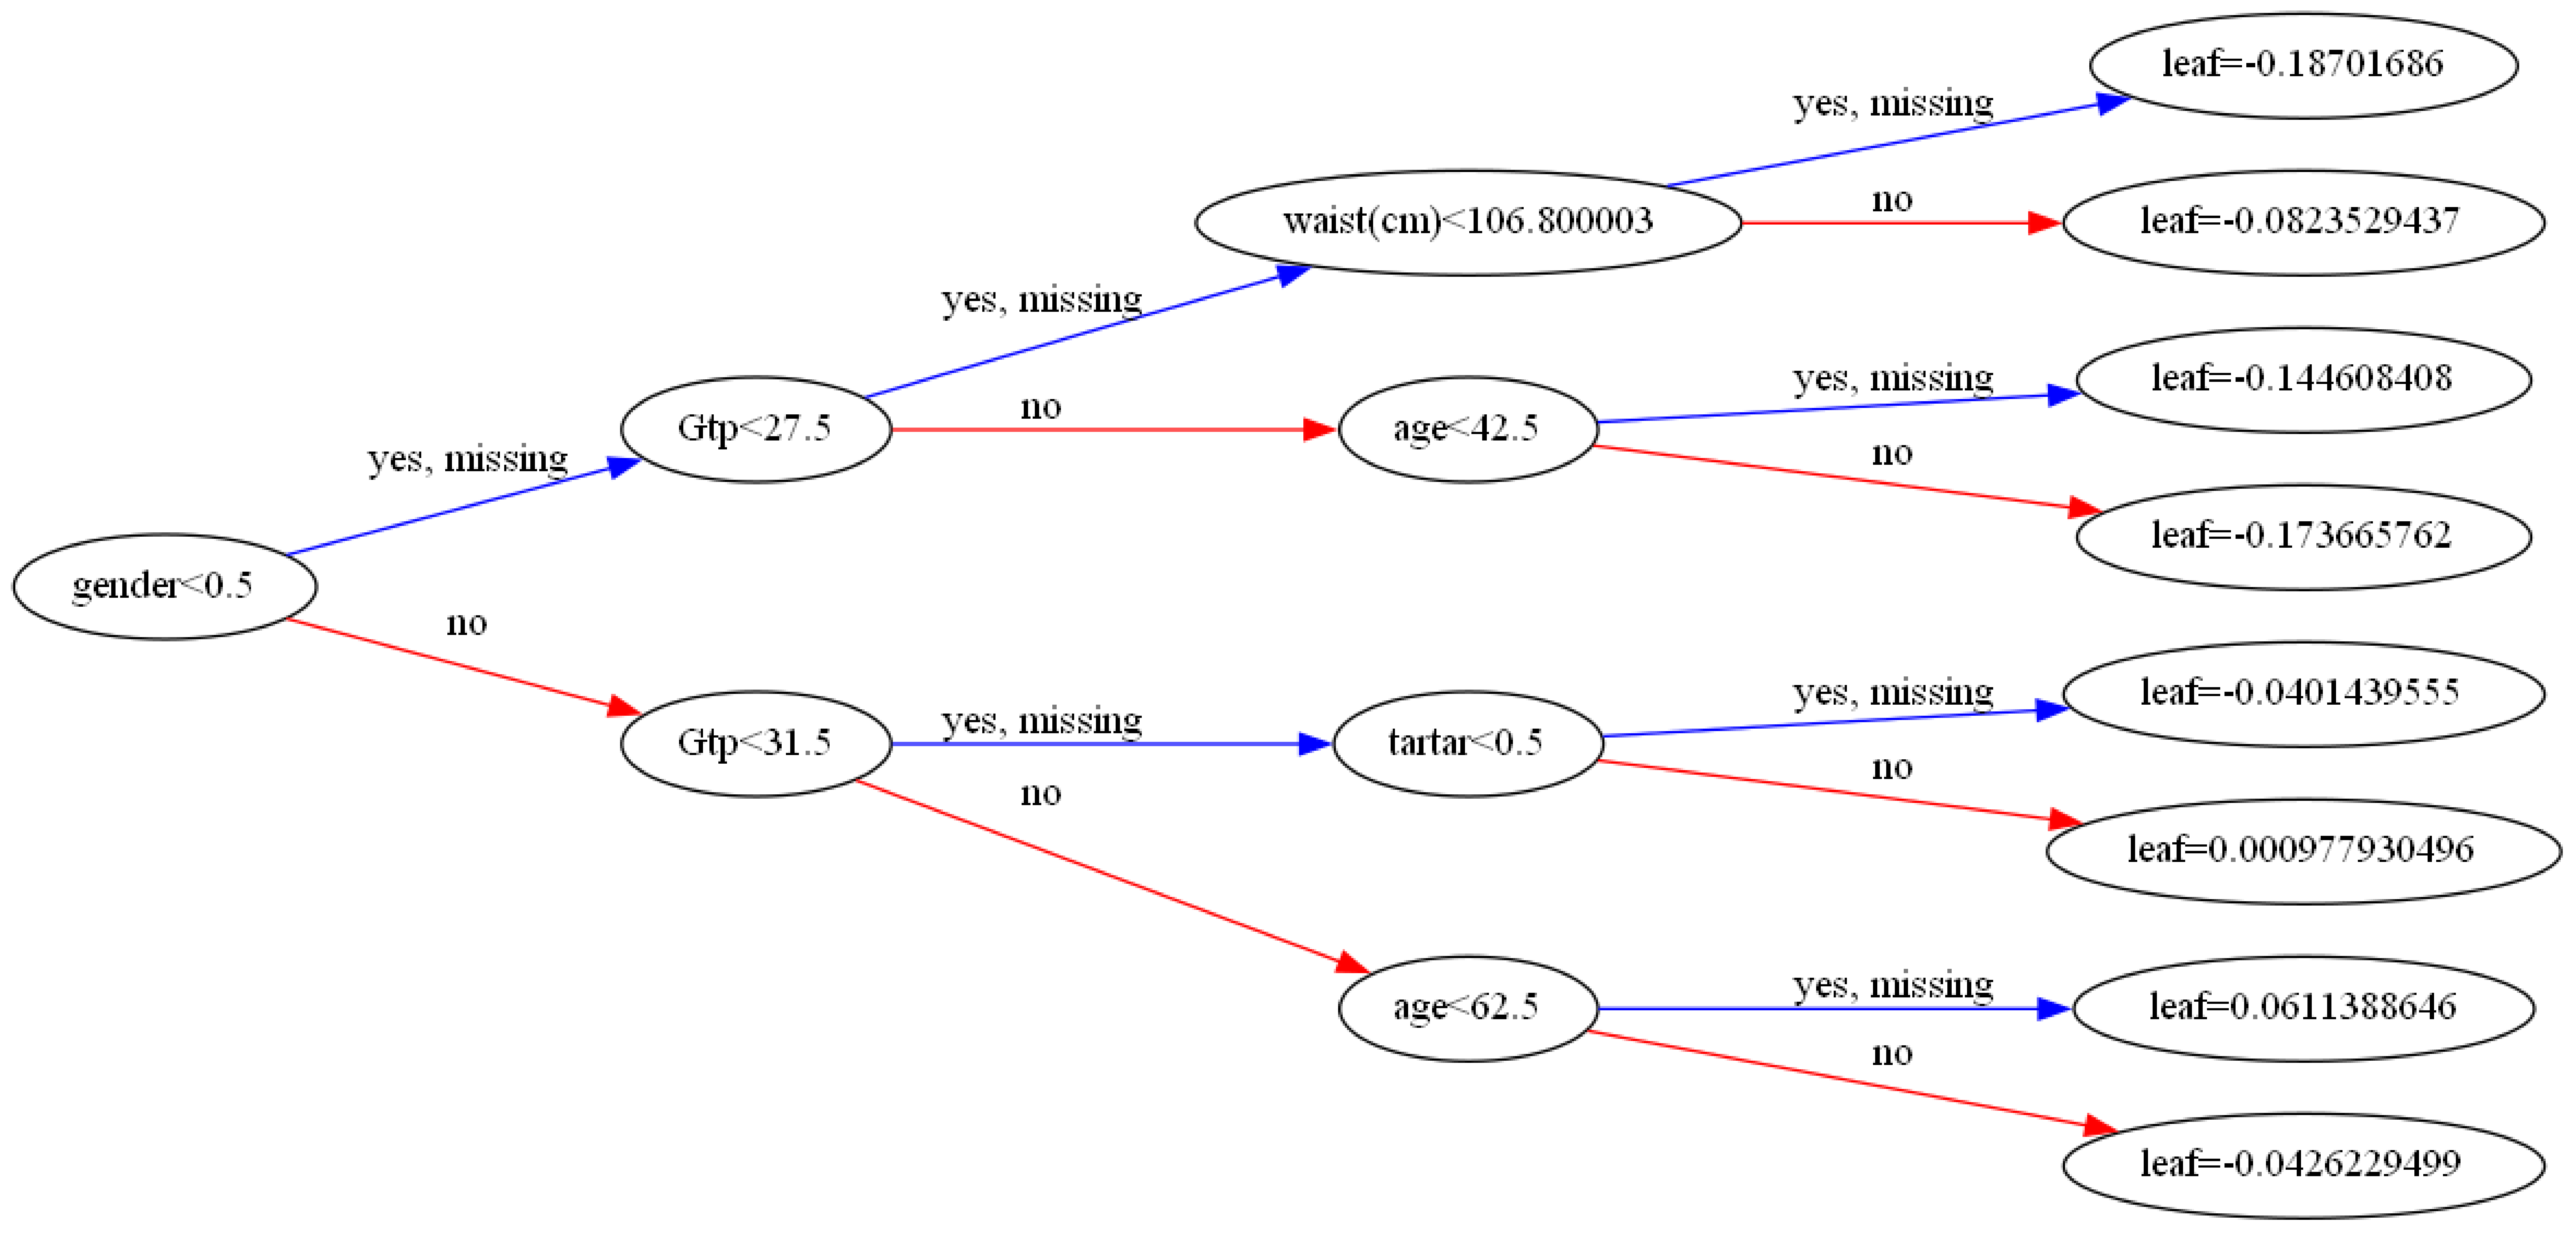

In [31]:
# num_trees : 그림을 여러개 그릴시 그림 번호
# rankdir : 트리의 방향, 디폴트는 위아래 방향
# rankdir="LR" : 왼쪽에서 오른쪽 방향으로 트리를 보여준다.
xgb.plot_tree(xgb_clf, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(150, 100)


plt.show()

## 2.2.2 Grid Search를 이용한 최적 하이퍼 파라미터 탐색

**n_estimator,max_depth,min_child_weight**

In [32]:
from sklearn.model_selection import GridSearchCV
# xgb 모델 생성
xgb_clf = XGBClassifier(learning_rate=0.1, 
                        n_estimators=50,
                        gamma=0, 
                        subsample=0.8, #각 트리마다 관측데이터 샘플링, 디폴트는 1 0.5~1사이 지정
                        colsample_bytree=0.8, #각 트리마다 x값 샘플링 비율 디폴1 0.5~1사이 지정
                        objective= 'binary:logistic', 
                        verbose=10)


xgb_params = { 
              'max_depth':[3,6,9,12], 
              'min_child_weight':[1,3,5]
             }

start = time.time()

grid_clf = GridSearchCV(xgb_clf,xgb_params,scoring='accuracy',cv=5)
grid_clf.fit(x_train, y_train)
print(grid_clf.best_params_)
grid_pred = grid_clf.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred))) # max_depth : 6, min_child_weight : 1
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 55.4 sec

{'max_depth': 6, 'min_child_weight': 1}
분류 결과 : 0.8 
XGB 수행 시간: 62.7 초 


In [33]:
xgb_clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=100,
                    gamma=0, 
                    subsample=0.8, 
                    colsample_bytree=0.8, 
                    objective= 'binary:logistic', 
                    verbose=10)


xgb_params = { 
              'max_depth':range(3,13,3), 
              'min_child_weight':range(1,6,2)
             }

start = time.time()

grid_clf = GridSearchCV(xgb_clf,xgb_params,scoring='accuracy',cv=5)
grid_clf.fit(x_train, y_train)
print(grid_clf.best_params_)
grid_pred = grid_clf.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred)))
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 93.8 sec

{'max_depth': 6, 'min_child_weight': 1}
분류 결과 : 0.8 
XGB 수행 시간: 118.4 초 


In [34]:
xgb_clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=150,
                    gamma=0, 
                    subsample=0.8, 
                    colsample_bytree=0.8, 
                    objective= 'binary:logistic', 
                    verbose=10)


xgb_params = { 
              'max_depth':range(3,13,3), 
              'min_child_weight':range(1,6,2)
             }

start = time.time()

grid_clf = GridSearchCV(xgb_clf,xgb_params,scoring='accuracy',cv=5)
grid_clf.fit(x_train, y_train)
print(grid_clf.best_params_)
grid_pred = grid_clf.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred)))
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 93.8 sec

{'max_depth': 3, 'min_child_weight': 3}
분류 결과 : 0.8 
XGB 수행 시간: 184.3 초 


In [35]:
xgb_clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=200,
                    gamma=0, 
                    subsample=0.8, 
                    colsample_bytree=0.8, 
                    objective= 'binary:logistic', 
                    verbose=10)


xgb_params = { 
              'max_depth':range(3,13,3), 
              'min_child_weight':range(1,6,2)
             }

start = time.time()

grid_clf = GridSearchCV(xgb_clf,xgb_params,scoring='accuracy',cv=5)
grid_clf.fit(x_train, y_train)
print(grid_clf.best_params_)
grid_pred = grid_clf.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred)))
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 186.3 sec

{'max_depth': 3, 'min_child_weight': 5}
분류 결과 : 0.8 
XGB 수행 시간: 847.9 초 


In [36]:
xgb_clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=1000,
                    gamma=0, 
                    subsample=0.8, 
                    colsample_bytree=0.8, 
                    objective= 'binary:logistic', 
                    verbose=10)


xgb_params = { 
              'max_depth':range(3,13,3), 
              'min_child_weight':range(1,6,2)
             }

start = time.time()

grid_clf = GridSearchCV(xgb_clf,xgb_params,scoring='accuracy',cv=5)
grid_clf.fit(x_train, y_train)
print(grid_clf.best_params_)
grid_pred = grid_clf.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred)))
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 840.7 sec

{'max_depth': 3, 'min_child_weight': 3}
분류 결과 : 0.8 
XGB 수행 시간: 1284.6 초 


**gamma**

In [37]:
xgb_clf_1 = XGBClassifier(learning_rate=0.1, 
                          n_estimators=100,
                          max_depth=6,
                          min_child_weight=5,
                          gamma=0, 
                          subsample=0.8, 
                          colsample_bytree=0.8, 
                          objective= 'binary:logistic', 
                          verbose=10)


xgb_params = { 
              'gamma':[i/10.0 for i in range(0,5)]
             }

start = time.time()

grid_clf_1 = GridSearchCV(xgb_clf_1,xgb_params,scoring='accuracy',cv=5)
grid_clf_1.fit(x_train, y_train)
print(grid_clf_1.best_params_)
grid_pred_1 = grid_clf_1.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred_1))) # gamma : 0.0
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 32.0 sec

{'gamma': 0.2}
분류 결과 : 0.8 
XGB 수행 시간: 36.9 초 


**subsample, colsample_bytree**

In [38]:
xgb_clf_2 = XGBClassifier(learning_rate=0.1, 
                          n_estimators=100,
                          max_depth=6,
                          min_child_weight=5,
                          gamma=0, 
                          subsample=0.8, 
                          colsample_bytree=0.8, 
                          objective= 'binary:logistic', 
                          verbose=10)


xgb_params = { 
              'subsample':[i/10.0 for i in range(6,10)],
              'colsample_bytree':[i/10.0 for i in range(6,10)]
             }

start = time.time()

grid_clf_2 = GridSearchCV(xgb_clf_2,xgb_params,scoring='accuracy',cv=5)
grid_clf_2.fit(x_train, y_train)
print(grid_clf_2.best_params_)
grid_pred_2 = grid_clf_2.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred_2))) # colsample_bytree : 0.8, subsample : 0.8
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 92.1 sec

{'colsample_bytree': 0.7, 'subsample': 0.7}
분류 결과 : 0.8 
XGB 수행 시간: 140.3 초 


In [39]:
xgb_clf_3 = XGBClassifier(learning_rate=0.1, 
                          n_estimators=100,
                          max_depth=6,
                          min_child_weight=5,
                          gamma=0.4, 
                          subsample=0.8, 
                          colsample_bytree=0.8, 
                          objective= 'binary:logistic', 
                          verbose=10)


xgb_params = { 
              'colsample_bytree':[i/10.0 for i in range(6,10)]
             }

start = time.time()

grid_clf_3 = GridSearchCV(xgb_clf_3,xgb_params,scoring='accuracy',cv=5)
grid_clf_3.fit(x_train, y_train)
print(grid_clf_3.best_params_)
grid_pred_3 = grid_clf_3.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred_3)))
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start))

{'colsample_bytree': 0.9}
분류 결과 : 0.8 
XGB 수행 시간: 31.7 초 


**Tuning 결과**

In [60]:

start = time.time()
xgb_clf = XGBClassifier(learning_rate=0.1, 
                        n_estimators=1000,
                        max_depth=6,
                        min_child_weight=5,
                        gamma=0, 
                        subsample=0.8, 
                        colsample_bytree=0.9, 
                        objective= 'binary:logistic', 
                        verbose=10).fit(x_train,y_train)

xgb_pred = xgb_clf.predict(x_test)

xgb_pred_probs = xgb_clf.predict_proba(x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,xgb_pred)))

XGB 수행 시간: 17.1 초 
분류 결과 : 0.9 


In [61]:
get_clf_eval(y_test, xgb_pred, xgb_pred_probs)

오차 행렬
[[6688  348]
 [ 337 3766]]
정확도: 0.9385, 정밀도: 0.9154, 재현율: 0.9179,    F1: 0.9166, AUC:0.9838


In [69]:
hyper.append(['Hyperparameter tuned' , accuracy_score(y_test,xgb_pred),precision_score(y_test,xgb_pred),recall_score(y_test,xgb_pred),f1_score(y_test,xgb_pred),roc_auc_score(y_test,xgb_pred_probs)])

In [75]:
pd.DataFrame(hyper , columns=['','정확도','정밀도','재현율','f1 score','AUC score'])

정확도       정밀도       재현율  f1 score  AUC score
0            Non scaled  0.799982  0.720226  0.747258  0.733493   0.887832
1  Hyperparameter tuned  0.938504  0.915411  0.917865  0.916636   0.983804

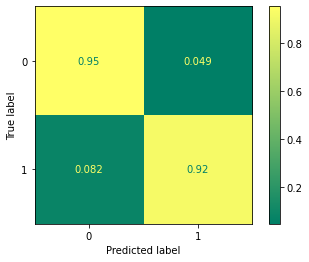

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgb_clf, x_test, y_test, cmap = 'summer', normalize = "true");

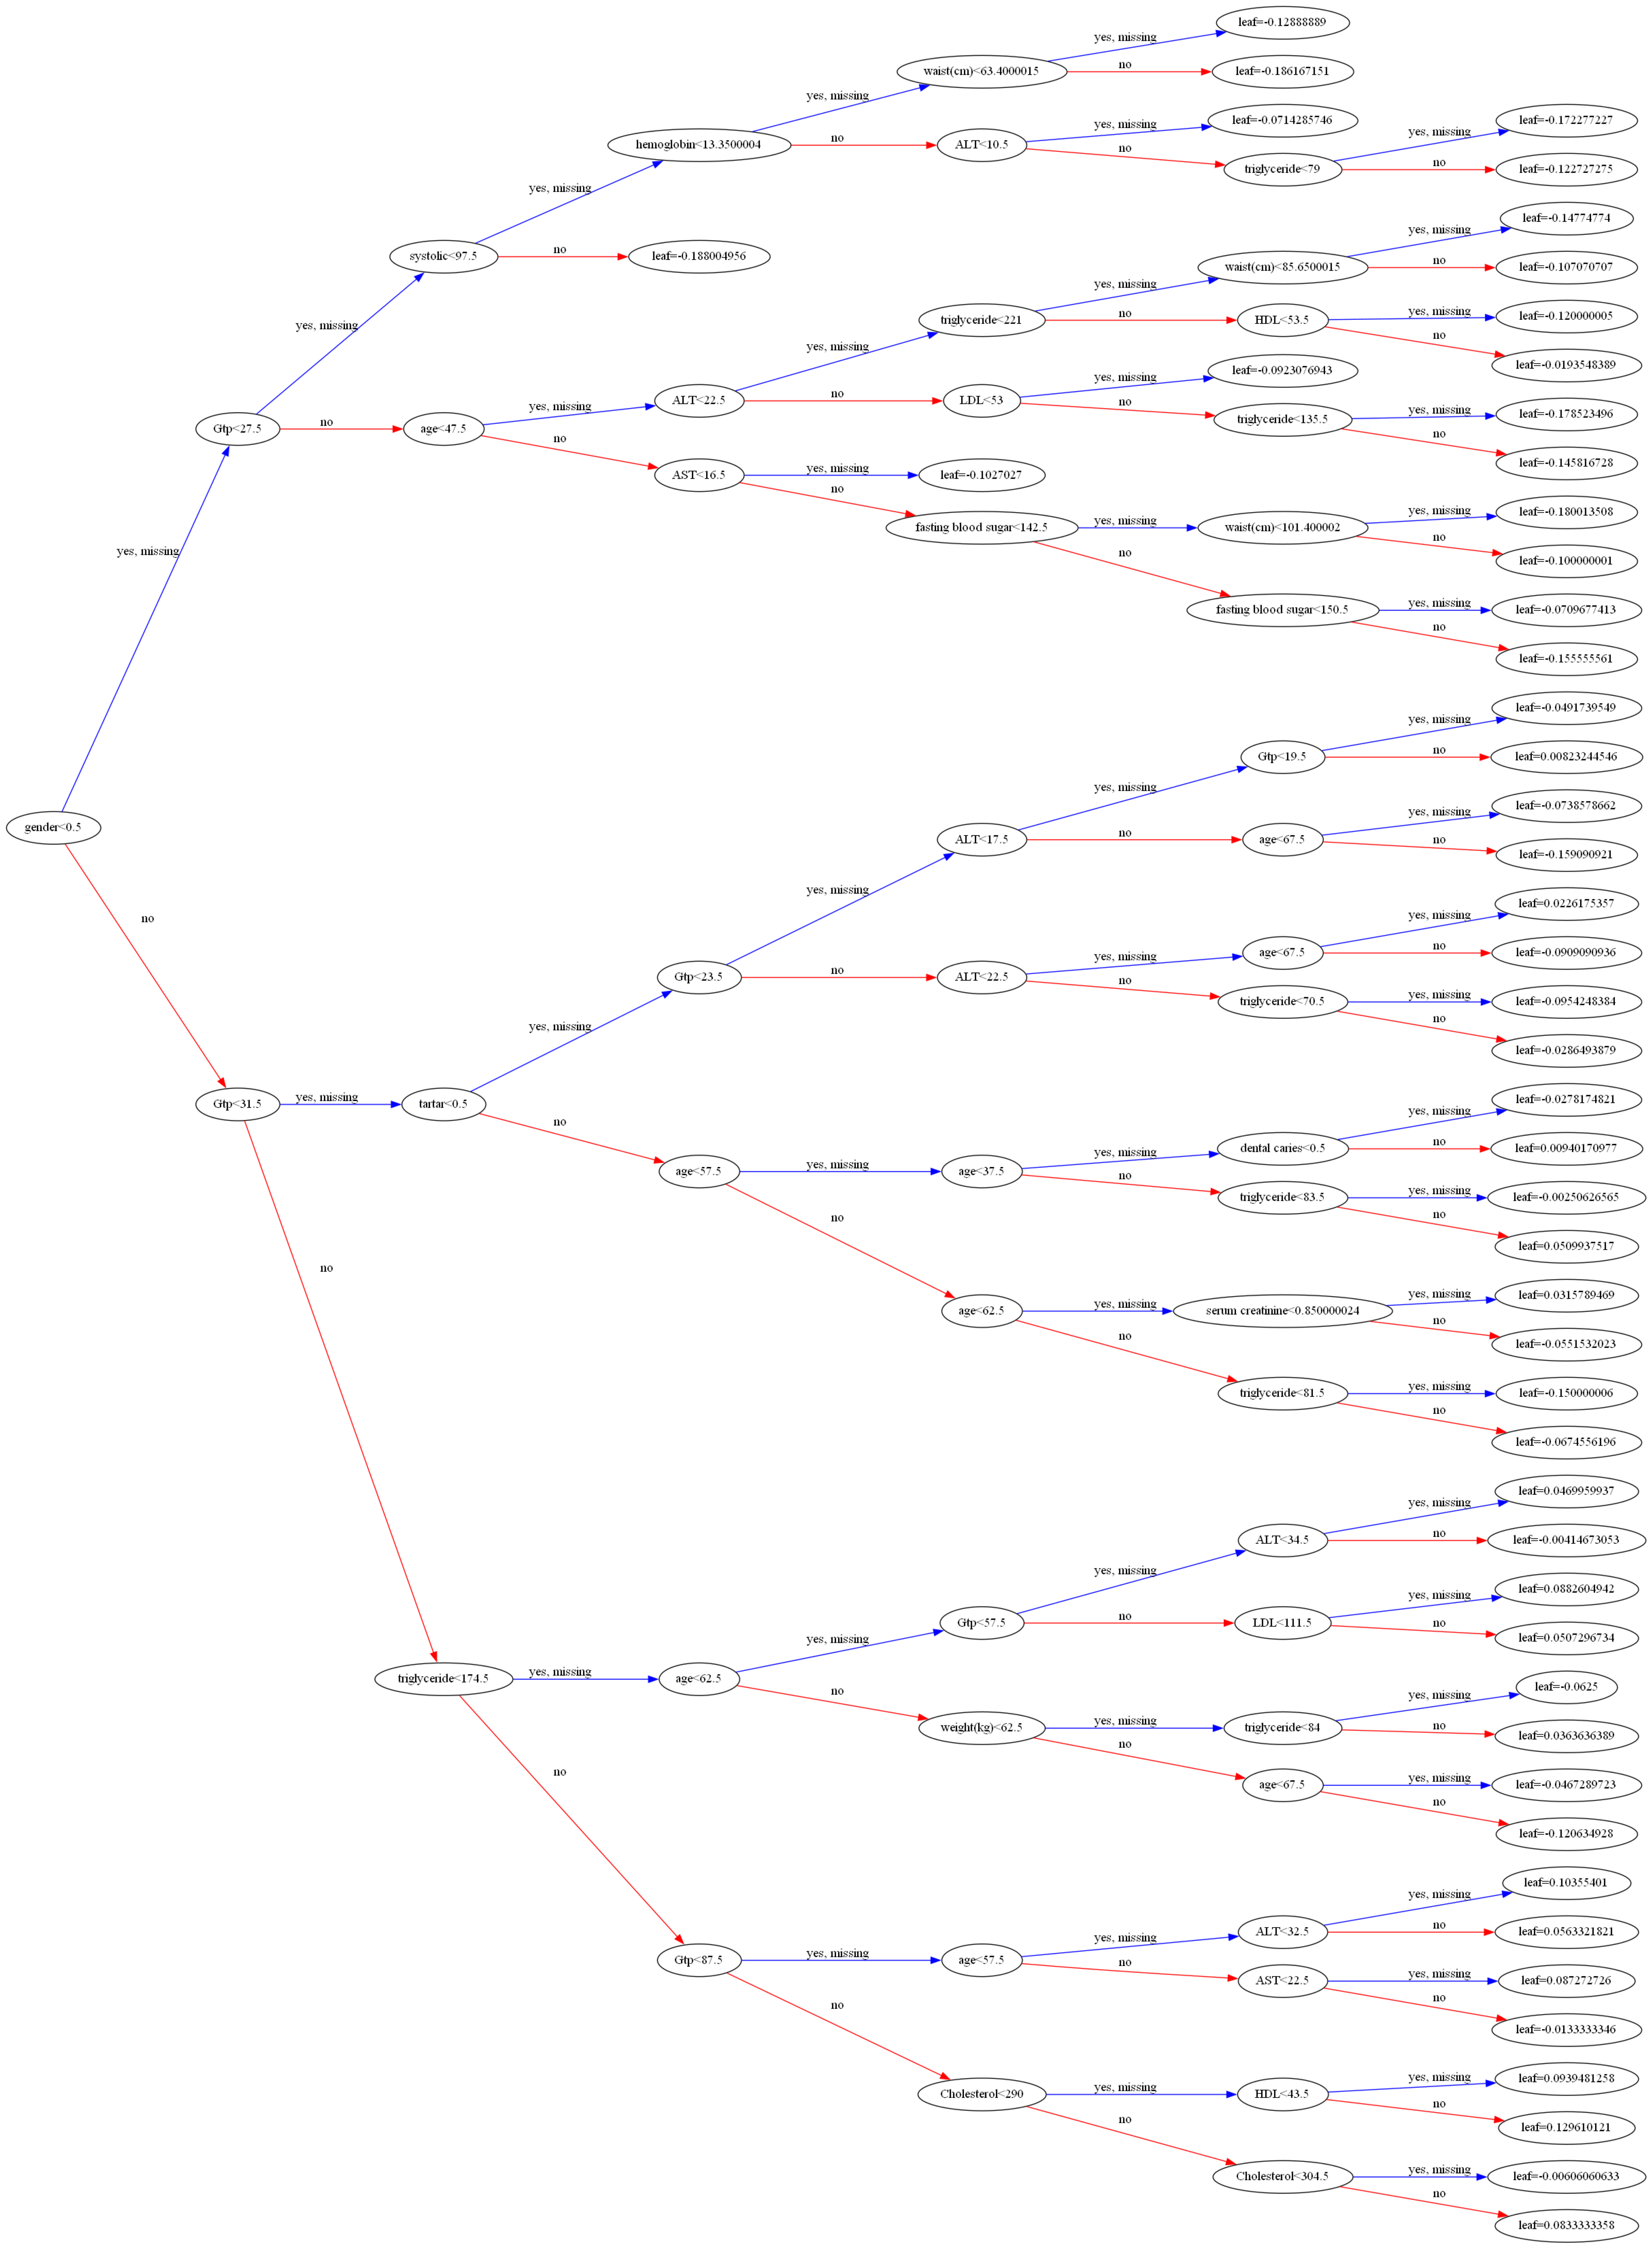

In [43]:
import xgboost as xgb

# num_trees : 그림을 여러개 그릴시 그림 번호
# rankdir : 트리의 방향, 디폴트는 위아래 방향
# rankdir="LR" : 왼쪽에서 오른쪽 방향으로 트리를 보여준다.
xgb.plot_tree(xgb_clf, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(150, 100)


plt.show()

In [63]:
# #micro-average ROC curve and ROC area
# fpr, tpr, _ = roc_curve(y_test.values, xgb_pred_probs)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(10,10))
# lw = 2
# plt.plot(fpr, tpr, color='red',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
# plt.xlim([-0.02, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC curve')
# plt.legend(loc="lower right")
# # plt.show()

## 3. Scaler 별 결과 비교

In [76]:
# competition_format
x_train = pd.read_csv('../data/x_train.csv')
x_test = pd.read_csv('../data/x_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')
#x_train = preprocessing(x_train)
#x_test = preprocessing(x_test)
y_train = preprocessing(y_train) 
y_test = preprocessing(y_test) 

In [ ]:
std_x_train, std_x_test = scaling(x_train, x_test, 'StandardScaler()')
rbt_x_train, rbt_x_test = scaling(x_train, x_test, 'RobustScaler()')
log_x_train, log_x_test = scaling(x_train, x_test, 'logScaler')
mmx_x_train, mmx_x_test = scaling(x_train, x_test)

In [77]:
std_x_train, std_x_test = scaling(x_train, x_test, 'StandardScaler()')

In [78]:
rbt_x_train, rbt_x_test = scaling(x_train, x_test, 'RobustScaler()')

In [79]:
log_x_train, log_x_test = scaling(x_train, x_test, 'logScaler')

In [80]:
mmx_x_train, mmx_x_test = scaling(x_train, x_test)

In [84]:
# Train the model
start = time.time()
std_xgb_clf = XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000,
                            max_depth=6,
                            min_child_weight=5,
                            gamma=0, 
                            subsample=0.8, 
                            colsample_bytree=0.9, 
                            objective= 'binary:logistic', 
                            verbose=10).fit(std_x_train,y_train)
# Make prediction
std_xgb_pred = std_xgb_clf.predict(std_x_test)
# Get predicted probability
std_xgb_pred_probs = std_xgb_clf.predict_proba(std_x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 15.1 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,std_xgb_pred)))

XGB 수행 시간: 17.6 초 
분류 결과 : 0.9 


In [66]:
get_clf_eval(y_test, std_xgb_pred, std_xgb_pred_probs)

오차 행렬
[[6692  344]
 [ 346 3757]]
정확도: 0.9381, 정밀도: 0.9161, 재현율: 0.9157,    F1: 0.9159, AUC:0.9834


In [81]:
scale = []

In [85]:
scale.append(['Standard sclaer' , accuracy_score(y_test,std_xgb_pred),precision_score(y_test,std_xgb_pred),recall_score(y_test,std_xgb_pred),f1_score(y_test,std_xgb_pred),roc_auc_score(y_test,std_xgb_pred_probs)])

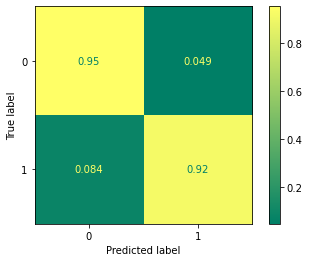

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(std_xgb_clf, std_x_test, y_test, cmap = 'summer', normalize = "true");

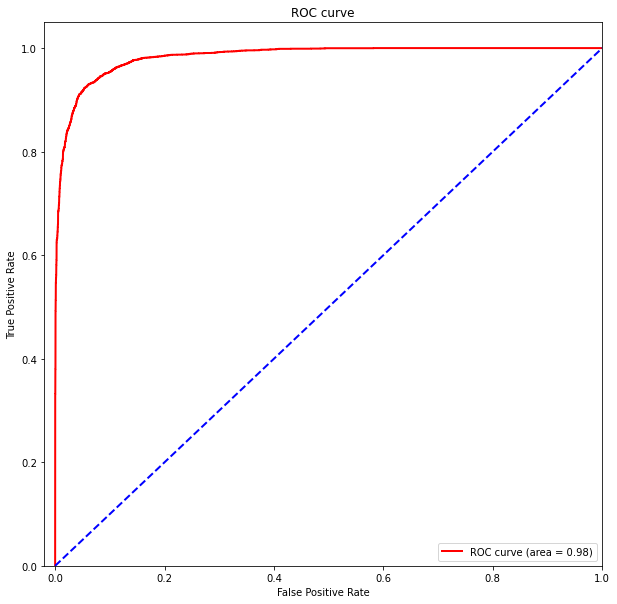

In [70]:
#  ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, std_xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [87]:
# Train the model
start = time.time()
rbt_xgb_clf = XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000,
                            max_depth=6,
                            min_child_weight=5,
                            gamma=0, 
                            subsample=0.8, 
                            colsample_bytree=0.9, 
                            objective= 'binary:logistic', 
                            verbose=10).fit(rbt_x_train,y_train)

rbt_xgb_pred = rbt_xgb_clf.predict(rbt_x_test)

rbt_xgb_pred_probs = rbt_xgb_clf.predict_proba(rbt_x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,rbt_xgb_pred)))

XGB 수행 시간: 18.4 초 
분류 결과 : 0.9 


In [72]:
get_clf_eval(y_test, rbt_xgb_pred, rbt_xgb_pred_probs)

오차 행렬
[[6699  337]
 [ 349 3754]]
정확도: 0.9384, 정밀도: 0.9176, 재현율: 0.9149,    F1: 0.9163, AUC:0.9844


In [88]:
scale.append(['Robust sclaer' , accuracy_score(y_test,rbt_xgb_pred),precision_score(y_test,rbt_xgb_pred),recall_score(y_test,rbt_xgb_pred),f1_score(y_test,rbt_xgb_pred),roc_auc_score(y_test,rbt_xgb_pred_probs)])

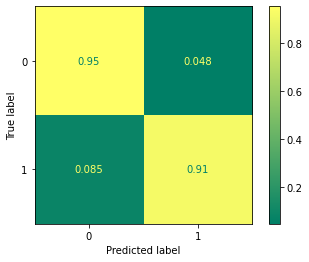

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rbt_xgb_clf, rbt_x_test, y_test, cmap = 'summer', normalize = "true");

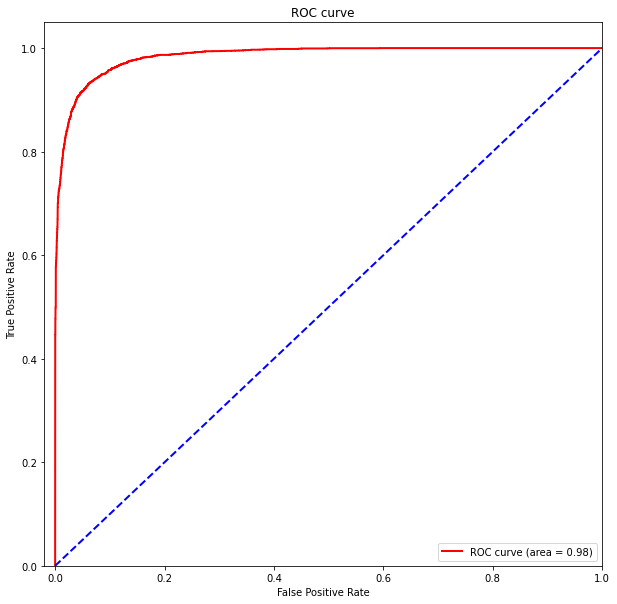

In [75]:
#  ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, rbt_xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [89]:
# Train the model
start = time.time()
mmx_xgb_clf = XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000,
                            max_depth=6,
                            min_child_weight=5,
                            gamma=0, 
                            subsample=0.8, 
                            colsample_bytree=0.9, 
                            objective= 'binary:logistic', 
                            verbose=10).fit(mmx_x_train,y_train)
# Make prediction
mmx_xgb_pred = mmx_xgb_clf.predict(mmx_x_test)
# Get predicted probability
mmx_xgb_pred_probs = mmx_xgb_clf.predict_proba(mmx_x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,mmx_xgb_pred)))

XGB 수행 시간: 19.3 초 
분류 결과 : 0.9 


In [77]:
get_clf_eval(y_test, mmx_xgb_pred, mmx_xgb_pred_probs)

오차 행렬
[[6700  336]
 [ 343 3760]]
정확도: 0.9390, 정밀도: 0.9180, 재현율: 0.9164,    F1: 0.9172, AUC:0.9843


In [94]:
scale.append(['MinMax scaler' , accuracy_score(y_test,mmx_xgb_pred),precision_score(y_test,mmx_xgb_pred),recall_score(y_test,mmx_xgb_pred),f1_score(y_test,mmx_xgb_pred),roc_auc_score(y_test,mmx_xgb_pred_probs)])

In [95]:
scale

[['Non scaled',
  0.9385043540712811,
  0.91541079241614,
  0.91786497684621,
  0.9166362419374466,
  0.9838037434858533],
 ['Standard sclaer',
  0.9380554807433342,
  0.9161180199951231,
  0.9156714599073849,
  0.9158946855192588,
  0.983373138832538],
 ['Robust sclaer',
  0.9384145794056917,
  0.9176240527988266,
  0.9149402875944431,
  0.9162802050280694,
  0.9843552576027995],
 ['MinMax scaler',
  0.9390430020648173,
  0.91796875,
  0.9164026322203266,
  0.9171850225637274,
  0.9843386132832824]]

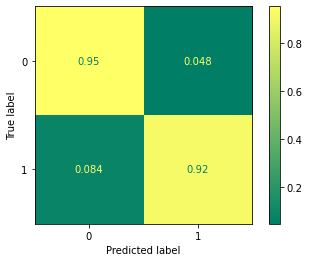

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(mmx_xgb_clf, mmx_x_test, y_test, cmap = 'summer', normalize = "true");

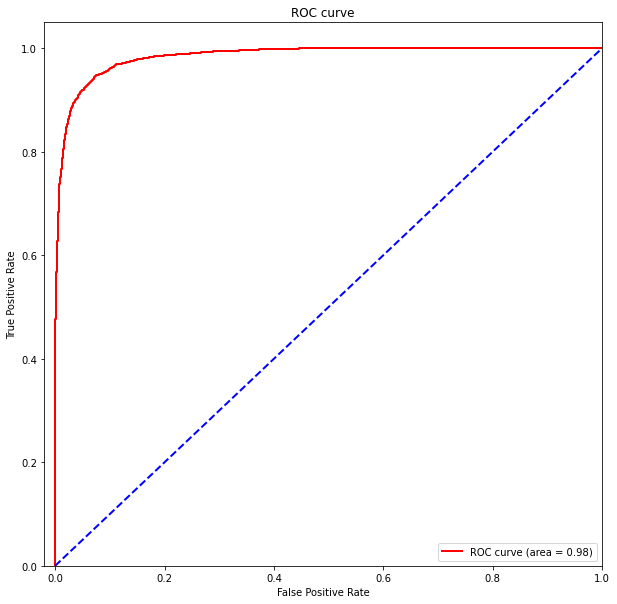

In [79]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, mmx_xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [96]:
# Train the model
start = time.time()
log_xgb_clf = XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000,
                            max_depth=6,
                            min_child_weight=5,
                            gamma=0, 
                            subsample=0.8,
                            colsample_bytree=0.9,
                            objective= 'binary:logistic', 
                            verbose=10).fit(log_x_train,y_train)
# Make prediction
log_xgb_pred = log_xgb_clf.predict(log_x_test)
# Get predicted probability
log_xgb_pred_probs = log_xgb_clf.predict_proba(log_x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,log_xgb_pred)))

XGB 수행 시간: 18.8 초 
분류 결과 : 0.9 


In [81]:
get_clf_eval(y_test, log_xgb_pred, log_xgb_pred_probs)

오차 행렬
[[6700  336]
 [ 343 3760]]
정확도: 0.9390, 정밀도: 0.9180, 재현율: 0.9164,    F1: 0.9172, AUC:0.9843


In [97]:
scale.append(['Log scaler' , accuracy_score(y_test,log_xgb_pred),precision_score(y_test,log_xgb_pred),recall_score(y_test,log_xgb_pred),f1_score(y_test,log_xgb_pred),roc_auc_score(y_test,log_xgb_pred_probs)])

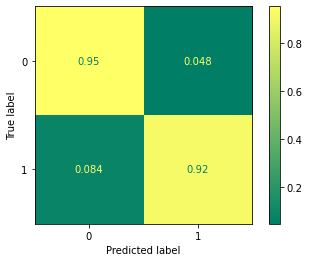

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_xgb_clf, log_x_test, y_test, cmap = 'summer', normalize = "true");

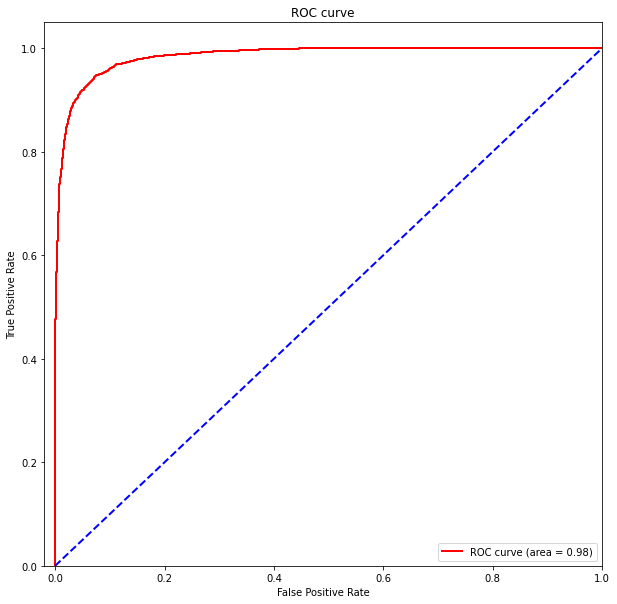

In [83]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, log_xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [99]:
pd.DataFrame(scale , columns=['' , '정확도','정밀도','재현율','f1 스코어','ROC_AUC 스코어'])

정확도       정밀도       재현율    f1 스코어  ROC_AUC 스코어
0       Non scaled  0.938504  0.915411  0.917865  0.916636     0.983804
1  Standard sclaer  0.938055  0.916118  0.915671  0.915895     0.983373
2    Robust sclaer  0.938415  0.917624  0.914940  0.916280     0.984355
3    MinMax scaler  0.939043  0.917969  0.916403  0.917185     0.984339
4       Log scaler  0.939043  0.917969  0.916403  0.917185     0.984339

## 4. 이상값(Outlier) 관측 및 제거 후 결과 비교

**Competition Format**

In [101]:
# competition_format
x_train = pd.read_csv('../data/x_train.csv')
x_test  = pd.read_csv('../data/x_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test  = pd.read_csv('../data/y_test.csv') 

In [102]:
x_train = preprocessing(x_train)
x_test = preprocessing(x_test)
y_train = preprocessing(y_train) 
y_test = preprocessing(y_test) 

In [104]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# Train the model
start = time.time()
xgb_clf = XGBClassifier(learning_rate=0.1,n_estimators=1000, # n_estimators를 1000으로 설정
                        max_depth=3,
                        silent=False,
                        objective='binary:logistic',
                        booster='gbtree',
                        n_jobs=1,
                        nthread=None,
                        gamma=0).fit(x_train,y_train)
# Make prediction
xgb_pred = xgb_clf.predict(x_test)
# Get predicted probability
xgb_pred_probs = xgb_clf.predict_proba(x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 23.2 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,xgb_pred)))

XGB 수행 시간: 24.0 초 
분류 결과 : 0.8 


In [105]:
xgb_outlinecheck=[]
xgb_outlinecheck.append(['non outline', 
                   accuracy_score(y_test,xgb_pred), 
                   precision_score(y_test,xgb_pred), 
                   recall_score(y_test,xgb_pred), 
                   f1_score(y_test,xgb_pred), 
                   roc_auc_score(y_test,xgb_pred_probs)])

In [106]:
xgb_outlinecheck

[['non outline',
  0.7999820450668821,
  0.7202255109231853,
  0.7472581038264684,
  0.7334928229665072,
  0.8878316272415102]]

**Outlier detection with IQR**

In [107]:
import numpy as np

def outliers(data):
    Q1, Q3 = np.percentile(data, [25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5) #경계점 지정
    upper_bound = Q3 + (IQR * 1.5)
    
    #1사분위와 4분위에 속해 있는 데이터를 각각 지정 (경계점 넘어가는것들)
    return np.where((data > upper_bound) | (data < lower_bound))

In [108]:
def remove_outliers(x, y):
    outlier_index = []
    for col in x.columns:
        outlier_index_tmp = outliers(x[col])[0]
        outlier_index = np.concatenate((outlier_index,outlier_index_tmp),axis=None)


    d_out_index = []
    for i in x.index:
        if i in outlier_index:
            d_out_index.append(i)

    d_out_x = x.loc[d_out_index]
    d_out_x = d_out_x.reset_index(drop=True)
    
    d_out_y = y.loc[d_out_index]
    d_out_y = d_out_y.reset_index(drop=True)
    return d_out_x, d_out_y

In [109]:
d_out_x_train, d_out_y_train = remove_outliers(x_train, y_train)
d_out_x_test, d_out_y_test = remove_outliers(x_test, y_test)

## 이상치 제거후 

**Python wrapper**

In [89]:
# 이상치제거후

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# adjusting data into DMatirx type
dtrain = xgb.DMatrix(data=d_out_x_train,label=d_out_y_train,feature_names=d_out_x_train.columns)
dtest = xgb.DMatrix(data=d_out_x_test,label=d_out_y_test,feature_names=d_out_x_train.columns)

# list for each num_rounds
xgb_check = []

params = {'eta':0.1, 
          'objective':'binary:logistic', 
          'eval_metric':'logloss', 
          'early_stoppings':100, 
          'silent' : 0,
          'verbosity':0} 

num_rounds = 1000 



wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params, dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) 
d_out_pred_probs = xgb_model.predict(dtest)
d_out_preds = [1 if x > 0.5 else 0 for x in d_out_pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(d_out_y_test,d_out_preds)))

[0]	train-logloss:0.66021	eval-logloss:0.65914
[1]	train-logloss:0.63305	eval-logloss:0.63097
[2]	train-logloss:0.61032	eval-logloss:0.60733
[3]	train-logloss:0.59059	eval-logloss:0.58676
[4]	train-logloss:0.57399	eval-logloss:0.56931
[5]	train-logloss:0.55951	eval-logloss:0.55407
[6]	train-logloss:0.54698	eval-logloss:0.54099
[7]	train-logloss:0.53609	eval-logloss:0.52943
[8]	train-logloss:0.52642	eval-logloss:0.51915
[9]	train-logloss:0.51792	eval-logloss:0.51017
[10]	train-logloss:0.51043	eval-logloss:0.50213
[11]	train-logloss:0.50382	eval-logloss:0.49499
[12]	train-logloss:0.49788	eval-logloss:0.48894
[13]	train-logloss:0.49249	eval-logloss:0.48343
[14]	train-logloss:0.48780	eval-logloss:0.47862
[15]	train-logloss:0.48334	eval-logloss:0.47370
[16]	train-logloss:0.47923	eval-logloss:0.46919
[17]	train-logloss:0.47556	eval-logloss:0.46517
[18]	train-logloss:0.47204	eval-logloss:0.46162
[19]	train-logloss:0.46896	eval-logloss:0.45830
[20]	train-logloss:0.46603	eval-logloss:0.45520
[2

[170]	train-logloss:0.36073	eval-logloss:0.35552
[171]	train-logloss:0.36064	eval-logloss:0.35540
[172]	train-logloss:0.36030	eval-logloss:0.35510
[173]	train-logloss:0.36018	eval-logloss:0.35502
[174]	train-logloss:0.35963	eval-logloss:0.35443
[175]	train-logloss:0.35877	eval-logloss:0.35352
[176]	train-logloss:0.35851	eval-logloss:0.35324
[177]	train-logloss:0.35844	eval-logloss:0.35320
[178]	train-logloss:0.35824	eval-logloss:0.35299
[179]	train-logloss:0.35800	eval-logloss:0.35279
[180]	train-logloss:0.35769	eval-logloss:0.35251
[181]	train-logloss:0.35735	eval-logloss:0.35220
[182]	train-logloss:0.35666	eval-logloss:0.35149
[183]	train-logloss:0.35607	eval-logloss:0.35089
[184]	train-logloss:0.35584	eval-logloss:0.35073
[185]	train-logloss:0.35523	eval-logloss:0.35008
[186]	train-logloss:0.35515	eval-logloss:0.35000
[187]	train-logloss:0.35482	eval-logloss:0.34965
[188]	train-logloss:0.35448	eval-logloss:0.34940
[189]	train-logloss:0.35407	eval-logloss:0.34898
[190]	train-logloss:

[338]	train-logloss:0.29796	eval-logloss:0.29552
[339]	train-logloss:0.29738	eval-logloss:0.29497
[340]	train-logloss:0.29704	eval-logloss:0.29465
[341]	train-logloss:0.29678	eval-logloss:0.29440
[342]	train-logloss:0.29659	eval-logloss:0.29420
[343]	train-logloss:0.29647	eval-logloss:0.29411
[344]	train-logloss:0.29611	eval-logloss:0.29374
[345]	train-logloss:0.29588	eval-logloss:0.29357
[346]	train-logloss:0.29584	eval-logloss:0.29351
[347]	train-logloss:0.29532	eval-logloss:0.29308
[348]	train-logloss:0.29505	eval-logloss:0.29281
[349]	train-logloss:0.29488	eval-logloss:0.29262
[350]	train-logloss:0.29469	eval-logloss:0.29236
[351]	train-logloss:0.29467	eval-logloss:0.29234
[352]	train-logloss:0.29464	eval-logloss:0.29232
[353]	train-logloss:0.29427	eval-logloss:0.29203
[354]	train-logloss:0.29347	eval-logloss:0.29125
[355]	train-logloss:0.29317	eval-logloss:0.29095
[356]	train-logloss:0.29273	eval-logloss:0.29046
[357]	train-logloss:0.29197	eval-logloss:0.28956
[358]	train-logloss:

[506]	train-logloss:0.24550	eval-logloss:0.24566
[507]	train-logloss:0.24508	eval-logloss:0.24524
[508]	train-logloss:0.24477	eval-logloss:0.24488
[509]	train-logloss:0.24475	eval-logloss:0.24487
[510]	train-logloss:0.24423	eval-logloss:0.24445
[511]	train-logloss:0.24364	eval-logloss:0.24389
[512]	train-logloss:0.24330	eval-logloss:0.24359
[513]	train-logloss:0.24319	eval-logloss:0.24349
[514]	train-logloss:0.24295	eval-logloss:0.24326
[515]	train-logloss:0.24289	eval-logloss:0.24323
[516]	train-logloss:0.24279	eval-logloss:0.24313
[517]	train-logloss:0.24275	eval-logloss:0.24307
[518]	train-logloss:0.24229	eval-logloss:0.24266
[519]	train-logloss:0.24180	eval-logloss:0.24221
[520]	train-logloss:0.24134	eval-logloss:0.24182
[521]	train-logloss:0.24119	eval-logloss:0.24166
[522]	train-logloss:0.24100	eval-logloss:0.24146
[523]	train-logloss:0.24052	eval-logloss:0.24099
[524]	train-logloss:0.24000	eval-logloss:0.24023
[525]	train-logloss:0.23978	eval-logloss:0.24000
[526]	train-logloss:

[841]	train-logloss:0.16953	eval-logloss:0.17138
[842]	train-logloss:0.16918	eval-logloss:0.17096
[843]	train-logloss:0.16886	eval-logloss:0.17067
[844]	train-logloss:0.16861	eval-logloss:0.17042
[845]	train-logloss:0.16847	eval-logloss:0.17031
[846]	train-logloss:0.16841	eval-logloss:0.17025
[847]	train-logloss:0.16803	eval-logloss:0.16987
[848]	train-logloss:0.16778	eval-logloss:0.16965
[849]	train-logloss:0.16763	eval-logloss:0.16950
[850]	train-logloss:0.16747	eval-logloss:0.16934
[851]	train-logloss:0.16725	eval-logloss:0.16913
[852]	train-logloss:0.16717	eval-logloss:0.16906
[853]	train-logloss:0.16689	eval-logloss:0.16877
[854]	train-logloss:0.16656	eval-logloss:0.16842
[855]	train-logloss:0.16626	eval-logloss:0.16812
[856]	train-logloss:0.16611	eval-logloss:0.16795
[857]	train-logloss:0.16581	eval-logloss:0.16769
[858]	train-logloss:0.16570	eval-logloss:0.16755
[859]	train-logloss:0.16550	eval-logloss:0.16741
[860]	train-logloss:0.16512	eval-logloss:0.16701
[861]	train-logloss:

In [90]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [91]:
get_clf_eval(d_out_y_test, d_out_preds, d_out_pred_probs)

오차 행렬
[[3172   59]
 [  27 2311]]
정확도: 0.9846, 정밀도: 0.9751, 재현율: 0.9885,    F1: 0.9817, AUC:0.9985


**Scikit-learn wrapper**

In [110]:
# Train the model
start = time.time()
d_out_xgb_clf = XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000,
                            max_depth=6,
                            min_child_weight=5,
                            gamma=0, 
                            subsample=0.8, 
                            colsample_bytree=0.9, 
                            objective= 'binary:logistic', 
                            verbose=10).fit(d_out_x_train,d_out_y_train)

d_out_xgb_pred = d_out_xgb_clf.predict(d_out_x_test)

d_out_xgb_pred_probs = d_out_xgb_clf.predict_proba(d_out_x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(d_out_y_test,d_out_xgb_pred)))

XGB 수행 시간: 9.3 초 
분류 결과 : 1.0 


In [93]:
get_clf_eval(d_out_y_test, d_out_xgb_pred, d_out_xgb_pred_probs)

오차 행렬
[[3162   69]
 [  40 2298]]
정확도: 0.9804, 정밀도: 0.9708, 재현율: 0.9829,    F1: 0.9768, AUC:0.9979


In [111]:
xgb_outlinecheck.append(['remove outline', 
                   accuracy_score(d_out_y_test,d_out_xgb_pred), 
                   precision_score(d_out_y_test,d_out_xgb_pred), 
                   recall_score(d_out_y_test,d_out_xgb_pred), 
                   f1_score(d_out_y_test,d_out_xgb_pred), 
                   roc_auc_score(d_out_y_test,d_out_xgb_pred_probs)])

In [114]:
pd.DataFrame(xgb_outlinecheck , columns=['','정확도','정밀도','재현율','f1 스코어','ROC_AUC 스코어'])

정확도       정밀도       재현율    f1 스코어  ROC_AUC 스코어
0     non outline  0.799982  0.720226  0.747258  0.733493     0.887832
1  remove outline  0.980427  0.970849  0.982891  0.976833     0.997868

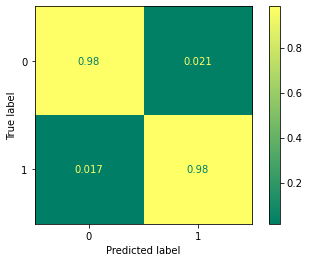

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(d_out_xgb_clf, d_out_x_test, d_out_y_test, cmap = 'summer', normalize = "true");

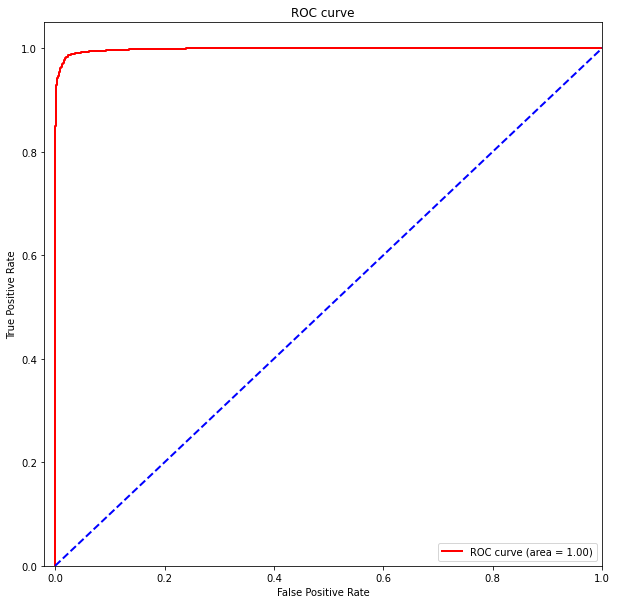

In [96]:
# ROC curve and ROC area
fpr, tpr, _ = roc_curve(d_out_y_test.values, d_out_xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## 5. 최종 모델 생성

In [7]:
def outliers(data):
    Q1, Q3 = np.percentile(data, [25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [8]:
def remove_outliers(x, y):
    outlier_index = []
    for col in x.columns:
        outlier_index_tmp = outliers(x[col])[0]
        outlier_index = np.concatenate((outlier_index,outlier_index_tmp),axis=None)

    d_out_index = []
    for i in x.index:
        if i in outlier_index:
            d_out_index.append(i)

    d_out_x = x.loc[d_out_index]
    d_out_x = d_out_x.reset_index(drop=True)
    
    d_out_y = y.loc[d_out_index]
    d_out_y = d_out_y.reset_index(drop=True)
    return d_out_x, d_out_y


In [17]:
d_out_x_train, d_out_y_train = remove_outliers(x_train, y_train)
d_out_x_test, d_out_y_test = remove_outliers(x_test, y_test)

In [18]:
# Train the model
start = time.time()
d_out_xgb_clf = XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000,
                            max_depth=6,
                            min_child_weight=5,
                            gamma=0, 
                            subsample=0.8, 
                            colsample_bytree=0.9, 
                            objective= 'binary:logistic', 
                            verbose=10).fit(d_out_x_train,d_out_y_train)

d_out_xgb_pred = d_out_xgb_clf.predict(d_out_x_test)

d_out_xgb_pred_probs = d_out_xgb_clf.predict_proba(d_out_x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(d_out_y_test,d_out_xgb_pred)))

[19:04:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

XGB 수행 시간: 7.6 초 
분류 결과 : 1.0 


In [19]:
finish.append(['remove outline', 
                   accuracy_score(d_out_y_test,d_out_xgb_pred), 
                   precision_score(d_out_y_test,d_out_xgb_pred), 
                   recall_score(d_out_y_test,d_out_xgb_pred), 
                   f1_score(d_out_y_test,d_out_xgb_pred), 
                   roc_auc_score(d_out_y_test,d_out_xgb_pred_probs)])

In [56]:
x_train = pd.read_csv('../data/x_train.csv')
x_test  = pd.read_csv('../data/x_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test  = pd.read_csv('../data/y_test.csv') 

In [57]:
# x_train=preprocessing(x_train)
# x_test=preprocessing(x_test)
y_train=preprocessing(y_train)
y_test=preprocessing(y_test)

In [ ]:
# std_x_train, std_x_test = scaling(x_train, x_test, 'StandardScaler()')
# rbt_x_train, rbt_x_test = scaling(x_train, x_test, 'RobustScaler()')
# log_x_train, log_x_test = scaling(x_train, x_test, 'logScaler')
# mmx_x_train, mmx_x_test = scaling(x_train, x_test)

In [23]:
std_x_train, std_x_test = scaling(x_train, x_test, 'StandardScaler()')

In [44]:
rbt_x_train, rbt_x_test = scaling(x_train, x_test, 'RobustScaler()')

In [50]:
log_x_train, log_x_test = scaling(x_train, x_test, 'logScaler')

In [58]:
mmx_x_train, mmx_x_test = scaling(x_train, x_test)

In [24]:
f_x_train_std,f_y_train = remove_outliers(std_x_train, y_train)
f_x_test_std,f_y_test = remove_outliers(std_x_test, y_test)

In [45]:
f_x_train_rbt,f_y_train = remove_outliers(rbt_x_train, y_train)
f_x_test_rbt,f_y_test = remove_outliers(rbt_x_test, y_test)

In [51]:
f_x_train_log,f_y_train = remove_outliers(log_x_train, y_train)
f_x_test_log,f_y_test = remove_outliers(log_x_test, y_test)

In [59]:
f_x_train_mmx,f_y_train = remove_outliers(mmx_x_train, y_train)
f_x_test_mmx,f_y_test = remove_outliers(mmx_x_test, y_test)

In [9]:
finish = []

In [40]:
# Train the model
start = time.time()
xgb_clf_std = XGBClassifier(learning_rate=0.1, 
                        n_estimators=1000,
                        max_depth=6,
                        min_child_weight=5,
                        gamma=0, 
                        subsample=0.8,
                        colsample_bytree=0.9, 
                        objective= 'binary:logistic', 
                        verbose=10).fit(f_x_train_std,f_y_train)

xgb_pred_std = xgb_clf_std.predict(f_x_test_std)

xgb_pred_probs_std = xgb_clf_std.predict_proba(f_x_test_std)[:,1]

end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(f_y_test,xgb_pred_std)))
finish.append(['Standard scaler', 
                   accuracy_score(f_y_test,xgb_pred_std), 
                   precision_score(f_y_test,xgb_pred_std), 
                   recall_score(f_y_test,xgb_pred_std), 
                   f1_score(f_y_test,xgb_pred_std), 
                   roc_auc_score(f_y_test,xgb_pred_probs_std)])

[22:18:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

XGB 수행 시간: 7.7 초 
분류 결과 : 1.0 


In [47]:
# Train the model
start = time.time()
xgb_clf_rbt = XGBClassifier(learning_rate=0.1, 
                        n_estimators=1000,
                        max_depth=6,
                        min_child_weight=5,
                        gamma=0, 
                        subsample=0.8,
                        colsample_bytree=0.9, 
                        objective= 'binary:logistic', 
                        verbose=10).fit(f_x_train_rbt,f_y_train)

xgb_pred_rbt = xgb_clf_rbt.predict(f_x_test_rbt)

xgb_pred_probs_rbt = xgb_clf_rbt.predict_proba(f_x_test_rbt)[:,1]

end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(f_y_test,xgb_pred_rbt)))
finish.append(['Robust scaler', 
                   accuracy_score(f_y_test,xgb_pred_rbt), 
                   precision_score(f_y_test,xgb_pred_rbt), 
                   recall_score(f_y_test,xgb_pred_rbt), 
                   f1_score(f_y_test,xgb_pred_rbt), 
                   roc_auc_score(f_y_test,xgb_pred_probs_rbt)])

[22:21:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

XGB 수행 시간: 7.8 초 
분류 결과 : 1.0 


In [55]:
# Train the model
start = time.time()
xgb_clf_log = XGBClassifier(learning_rate=0.1, 
                        n_estimators=1000,
                        max_depth=6,
                        min_child_weight=5,
                        gamma=0, 
                        subsample=0.8,
                        colsample_bytree=0.9, 
                        objective= 'binary:logistic', 
                        verbose=10).fit(f_x_train_log,f_y_train)

xgb_pred_log = xgb_clf_log.predict(f_x_test_log)

xgb_pred_probs_log = xgb_clf_log.predict_proba(f_x_test_log)[:,1]

end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(f_y_test,xgb_pred_log)))
finish.append(['Log scaler', 
                   accuracy_score(f_y_test,xgb_pred_log), 
                   precision_score(f_y_test,xgb_pred_log), 
                   recall_score(f_y_test,xgb_pred_log), 
                   f1_score(f_y_test,xgb_pred_log), 
                   roc_auc_score(f_y_test,xgb_pred_probs_log)])

[22:23:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

XGB 수행 시간: 8.0 초 
분류 결과 : 1.0 


In [60]:
# Train the model
start = time.time()
xgb_clf_mmx = XGBClassifier(learning_rate=0.1, 
                        n_estimators=1000,
                        max_depth=6,
                        min_child_weight=5,
                        gamma=0, 
                        subsample=0.8,
                        colsample_bytree=0.9, 
                        objective= 'binary:logistic', 
                        verbose=10).fit(f_x_train_mmx,f_y_train)

xgb_pred_mmx = xgb_clf_mmx.predict(f_x_test_mmx)

xgb_pred_probs_mmx = xgb_clf_mmx.predict_proba(f_x_test_mmx)[:,1]

end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(f_y_test,xgb_pred_mmx)))
finish.append(['Minmax scaler', 
                   accuracy_score(f_y_test,xgb_pred_mmx), 
                   precision_score(f_y_test,xgb_pred_mmx), 
                   recall_score(f_y_test,xgb_pred_mmx), 
                   f1_score(f_y_test,xgb_pred_mmx), 
                   roc_auc_score(f_y_test,xgb_pred_probs_mmx)])

[22:24:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

XGB 수행 시간: 7.7 초 
분류 결과 : 1.0 


In [120]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
# get_clf_eval(f_y_test, xgb_pred, xgb_pred_probs)

오차 행렬
[[3186   71]
 [  50 2302]]
정확도: 0.9784, 정밀도: 0.9701, 재현율: 0.9787,    F1: 0.9744, AUC:0.9976


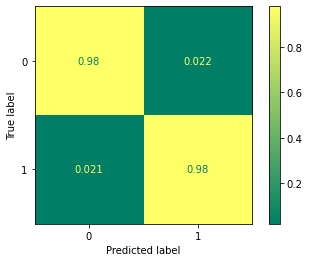

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xgb_clf, f_x_test, f_y_test, cmap = 'summer', normalize = "true");

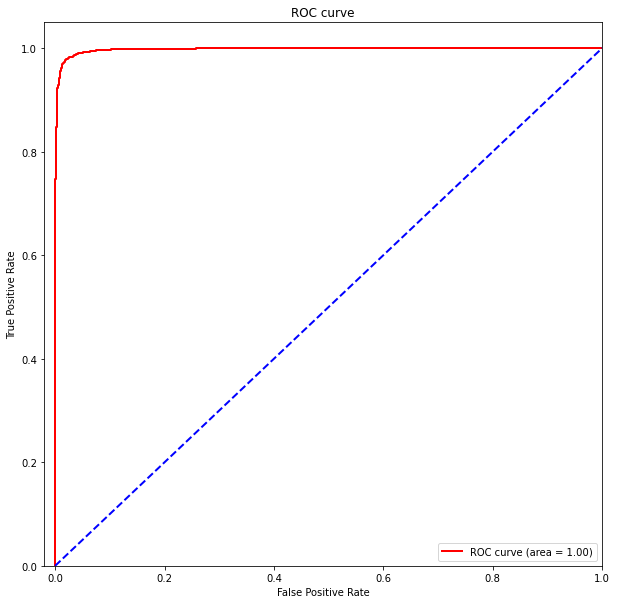

In [122]:
# ROC curve and ROC area
fpr, tpr, _ = roc_curve(f_y_test.values, xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [62]:
pd.DataFrame(finish , columns=['','정확도','정밀도','재현율','f1 스코어', 'Roc_auc 스코어'])

정확도       정밀도       재현율    f1 스코어  Roc_auc 스코어
0   remove outline  0.980427  0.970849  0.982891  0.976833     0.997868
1  Standard scaler  0.979724  0.970414  0.981616  0.975983     0.997300
2    Robust scaler  0.979530  0.969198  0.982464  0.975786     0.997712
3       Log scaler  0.978428  0.970080  0.978741  0.974392     0.997576
4    Minmax scaler  0.978428  0.970080  0.978741  0.974392     0.997576